# Telecom Churn Case Study

<hr style="border:1px solid blue">

A case study to solve a business problem by building a machine learning model to predict if a telecom customer will churn or not.
* Comprehend the given data set and perform Exploratory Data Analysis (EDA) to analyse the data set.
* Build a prediction model to identify the best fit variables that can predict the churning probability more accurately.

### Project Description

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

#### Data Set Brief Information
The data set contains information about the customer and details of their respective telecom usage.
A data dictionary is provided along with the data set to understand various terms and variables used.

#### Business Objective
Analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn.

#### Business Solution
Build a machine learning model that is able to predict churning customers based on the features provided and their respective usage.

### Data Understanding

In [1]:
# Import all required libraries
import numpy as np
import pandas as pd
# Display all columns
pd.set_option("display.max_columns", None)
# Display all floating point values with precision adjusted to two digits
pd.set_option("display.precision", 4)
import matplotlib.pyplot as plt
# To enable the inline plotting
%matplotlib inline
import seaborn as sns
# Ignore warnings due to library versions
import warnings
warnings.filterwarnings("ignore")
# Import date time
import datetime
# Import train_test_split to split data to random train and test subsets
from sklearn.model_selection import train_test_split
# Import min-max scalar for scaling data
from sklearn.preprocessing import StandardScaler
# Importing RFE and Logistic Regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# Importing Grid Search
from sklearn.model_selection import GridSearchCV
# Import library to calculate Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Import statistical model library
import statsmodels.api as sm
# Import various metrics for calculation
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_roc_curve
# Imporing SMOTE
from imblearn.over_sampling import SMOTE
# Import PCA
from sklearn.decomposition import PCA
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# Import Random forest classifier
from sklearn.ensemble import RandomForestClassifier
# Import Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
# Import KFold
from sklearn.model_selection import KFold

In [2]:
# Read the dataset
tc_df = pd.read_csv('train.csv')

In [3]:
# Check the shape of the dataframe
print('The given data set have {0} rows and {1} columns.\n\nLet\'s see first 5 values of data set.'.format(tc_df.shape[0],tc_df.shape[1]))

The given data set have 69999 rows and 172 columns.

Let's see first 5 values of data set.


In [4]:
# Check the first five rows
tc_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

**Get the concise summary of data set and data type of each column**

In [5]:
# Check the dataframe info
tc_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        69999 non-null  int64  
 1    circle_id                 69999 non-null  int64  
 2    loc_og_t2o_mou            69297 non-null  float64
 3    std_og_t2o_mou            69297 non-null  float64
 4    loc_ic_t2o_mou            69297 non-null  float64
 5    last_date_of_month_6      69999 non-null  object 
 6    last_date_of_month_7      69600 non-null  object 
 7    last_date_of_month_8      69266 non-null  object 
 8    arpu_6                    69999 non-null  float64
 9    arpu_7                    69999 non-null  float64
 10   arpu_8                    69999 non-null  float64
 11   onnet_mou_6               67231 non-null  float64
 12   onnet_mou_7               67312 non-null  float64
 13   onnet_mou_8               66296 non-null  fl

**Observations**

1) We don't have any columns without name.

2) There are lot of NULL values in data set and hence imputation might be required.

3) Several Date columns are present to indicate different recharge done for particular month.

4) Some features indicate Minutes of Usage (MOU), but it is not specified in name.

5) 6th, 7th and 8th month convention is used to represent feature names for June, July and August. We will use similar convention for Volume Based Cost (VBC) feature.

6) Some features looks to be categorical in nature, but it is marked as float type. We need to analyze more on data type conversion


### Data Cleaning and Standardizing

#### Data Duplication and Validity Check

We need make sure that there is no duplicated entries in given data set.

In [6]:
# Check if there is any duplicated entries in rows
tc_df[tc_df.duplicated()]

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability


**Observation** : There are no such rows that have duplicated entries.

#### Data Analysis

With the help of data dictionary, let's analyse each values filled in columns and understand their respective meaning.

**Observations**

1) Column 'id' is not required as it is an index variable.

2) Date columns is not required, since we need to know only recharge amount and other telecom features done for that particular month.

#### Data Filtering

In [7]:
# Remove id column as it is not required
tc_df.drop(labels = 'id', axis = 1, inplace = True)
dropped_columns = ['id']

#### Remove NULL values in Columns and Rows in entire index range

Check if there are any rows or columns that have entire content as NULL. We need to drop such columns or rows, since we can't impute any values.

In [8]:
# Check the number of columns having null values across entire index range
tc_df.isnull().all().sum()

0

In [9]:
# Check the number of rows having null values across entire column range
tc_df.isnull().all(axis = 1).sum()

0

**Conclusion**

* We have 0 columns where entire column values are NULL
* We have no rows which have entire row contents as NULL

In [10]:
# Rename column names as per majority convension
temp_dict = {'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8',
             'og_others_6' : 'og_others_mou_6', 'og_others_7' : 'og_others_mou_7', 'og_others_8' : 'og_others_mou_8',
             'ic_others_6' : 'ic_others_mou_6', 'ic_others_7' : 'ic_others_mou_7', 'ic_others_8' : 'ic_others_mou_8'}
tc_df = tc_df.rename(temp_dict, axis=1)

In [11]:
# Get the columns with 'date' in its name
list_of_columns = [d for d in tc_df.columns.to_list() if 'date' in d]
print('Date columns are:\n', list_of_columns)

Date columns are:
 ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']


In [12]:
# Function to display the percentage of missing data above a threshold limit
def find_missing_percentage(df, col, th):
    percent_missing = (df[col].isnull().sum() * 100 / len(df)).sort_values(ascending = False)
    percent_missing = percent_missing[percent_missing > th]
    pd.set_option("display.max_rows", None)
    print(percent_missing)
    pd.set_option("display.max_rows", 10)

In [13]:
# Find percentage of missing values in date column
find_missing_percentage(tc_df, list_of_columns, 0)

date_of_last_rech_data_6    74.9025
date_of_last_rech_data_7    74.4782
date_of_last_rech_data_8    73.6896
date_of_last_rech_8          3.5158
date_of_last_rech_7          1.7629
date_of_last_rech_6          1.5729
last_date_of_month_8         1.0472
last_date_of_month_7         0.5700
dtype: float64


**Observation** : There are lot of missing values in columns. As such these columns doesn't help in prediction, since probability of churning depends on if customer recharge amount is low or zero for consecutive months. So, let's delete these columns.

In [14]:
# Remove date columns as it is not required
tc_df.drop(labels = list_of_columns, axis = 1, inplace = True)
dropped_columns += list_of_columns

In [15]:
# Display all columns having at least one null value present in its rows
tc_df.columns[tc_df.isnull().any()]

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_6',
       ...
       'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6',
       'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8'],
      dtype='object', length=117)

In [16]:
# Find percentage of missing values in dataframe
find_missing_percentage(tc_df, tc_df.columns, 0)

total_rech_data_6     74.9025
arpu_2g_6             74.9025
arpu_3g_6             74.9025
fb_user_6             74.9025
night_pck_user_6      74.9025
av_rech_amt_data_6    74.9025
max_rech_data_6       74.9025
count_rech_3g_6       74.9025
count_rech_2g_6       74.9025
count_rech_2g_7       74.4782
fb_user_7             74.4782
night_pck_user_7      74.4782
total_rech_data_7     74.4782
max_rech_data_7       74.4782
arpu_3g_7             74.4782
arpu_2g_7             74.4782
count_rech_3g_7       74.4782
av_rech_amt_data_7    74.4782
fb_user_8             73.6896
arpu_3g_8             73.6896
max_rech_data_8       73.6896
arpu_2g_8             73.6896
count_rech_2g_8       73.6896
av_rech_amt_data_8    73.6896
total_rech_data_8     73.6896
count_rech_3g_8       73.6896
night_pck_user_8      73.6896
loc_ic_t2f_mou_8       5.2901
spl_og_mou_8           5.2901
og_others_mou_8        5.2901
isd_og_mou_8           5.2901
loc_ic_t2t_mou_8       5.2901
std_ic_mou_8           5.2901
loc_ic_mou

In [17]:
# Get the columns with 'mou' (Minutes of usage voice calls) in its name
list_of_columns = [m for m in tc_df.columns.to_list() if 'mou' in m]
print('MOU columns are:\n', list_of_columns)

MOU columns are:
 ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_mou_6', 'og_others_mou_7', 'og_others_mou_8', 'to

In [18]:
# Check the percentile and min-max of MOU columns
tc_df[list_of_columns].describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_mou_6,og_others_mou_7,og_others_mou_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_mou_6,ic_others_mou_7,ic_others_mou_8
count,69297.0,69297.0,69297.0,67231.0000,67312.0000,66296.0000,67231.0000,67312.0000,66296.0000,67231.0000,67312.0000,66296.0000,67231.0000,67312.0000,66296.0000,67231.0000,67312.0000,66296.0000,67231.0000,67312.0000,66296.0000,67231.0000,67312.0000,66296.0000,67231.0000,67312.0000,66296.0000,67231.0000,67312.0000,66296.0000,67231.0000,67312.0000,66296.0000,67231.0000,67312.0000,66296.000,67231.0000,67312.0000,66296.0000,67231.0,67312.0,66296.0,67231.0000,67312.0000,66296.0000,67231.0000,67312.0000,66296.0000,67231.0000,67312.0000,66296.0000,67231.0000,67312.0000,66296.0000,69999.0000,69999.0000,69999.0000,67231.0000,67312.0000,66296.0000,67231.0000,67312.0000,66296.0000,67231.0000,67312.0000,66296.0000,67231.0000,67312.0000,66296.0000,67231.0000,67312.0000,66296.0000,67231.0000,67312.0000,66296.0000,67231.0000,67312.0000,66296.0000,67231.0,67312.0,66296.0,67231.0000,67312.0000,66296.0000,69999.0000,69999.0000,69999.0000,67231.0000,67312.0000,66296.0000,67231.0000,67312.0000,66296.0000,67231.0000,67312.0000,66296.0000
mean,0.0,0.0,0.0,133.1533,133.8944,132.9783,198.8748,197.1534,196.5436,9.7654,7.0146,7.0049,14.1865,9.8422,9.7718,46.9049,46.1665,45.6861,93.2382,90.7992,91.1214,3.7432,3.7770,3.6617,1.1260,1.3611,1.4208,143.8936,140.7501,140.4765,80.6194,83.7759,83.4715,88.1521,91.5386,90.587,1.1264,1.0841,1.0577,0.0,0.0,0.0,169.9006,176.4012,175.1189,0.8458,0.8111,0.8416,3.9586,4.9768,5.0450,0.4626,0.0244,0.0331,306.4514,310.5727,304.5131,48.0433,47.8827,47.2564,107.1524,106.4899,108.1547,12.0507,12.5637,11.7168,167.2551,166.9451,167.1368,9.4770,9.8735,9.9102,20.7349,21.6854,21.0890,2.1463,2.1994,2.0752,0.0,0.0,0.0,32.3606,33.7608,33.0770,199.7106,201.8780,198.4860,0.0619,0.0334,0.0404,7.3942,8.1712,8.3484,0.8541,1.0197,0.9632
std,0.0,0.0,0.0,299.9631,311.2772,311.8966,316.8184,322.4822,324.0892,57.3744,55.9610,53.4081,73.4693,58.5119,64.6184,150.9718,154.7390,153.7169,162.0467,153.8526,152.9978,13.3195,13.5681,13.0092,5.7418,7.9141,6.5422,252.0346,246.3131,245.3424,255.0984,266.6933,267.0219,255.7716,267.5321,270.032,8.1366,8.3252,7.6969,0.0,0.0,0.0,392.0466,409.2995,410.6971,29.7475,29.2201,29.5634,15.8545,22.2298,17.7085,4.7684,1.7164,2.2325,465.5029,479.1318,477.9368,140.4998,147.7611,141.2494,168.4560,165.4525,166.2235,39.4161,43.4952,38.6069,252.5762,254.6887,249.2884,51.6645,56.1378,54.2482,80.2942,87.3145,81.5343,16.5222,16.1715,15.8654,0.0,0.0,0.0,104.3811,114.1422,108.4699,290.1148,296.7713,288.3367,0.1648,0.1373,0.1484,60.9512,63.6042,63.0976,12.1491,13.2254,11.6977
min,0.0,0.0

**Observation** : Minimum value in MOU columns are zero. Hence we can impute the missing values as zero, as it means that customer didn't initiate or receive a call.

In [19]:
# Impute zero for missing values in MOU columns
for col in list_of_columns:
    tc_df[col].fillna(0.00, inplace=True)

In [20]:
# Find all unique values in below features of dataset
list_of_columns = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
for col in list_of_columns:
    print(tc_df[col].value_counts())

0.0    17124
1.0      444
Name: night_pck_user_6, dtype: int64
0.0    17435
1.0      430
Name: night_pck_user_7, dtype: int64
0.0    18030
1.0      387
Name: night_pck_user_8, dtype: int64
1.0    16098
0.0     1470
Name: fb_user_6, dtype: int64
1.0    16249
0.0     1616
Name: fb_user_7, dtype: int64
1.0    16397
0.0     2020
Name: fb_user_8, dtype: int64


**Observation** : Above features are kind of categorical in nature - Yes or No type and more than 70% values are missing. We can't impute values as we can't predict if a customer applied for this particular scheme. Also dataframe doesn't imply anything specific or in relation to this scheme to predict or fill values. Hence we will drop these columns

In [21]:
# Remove fb and night pack feature columns as it is not required
tc_df.drop(labels = list_of_columns, axis = 1, inplace = True)
dropped_columns += list_of_columns

In [22]:
# Check the percentile and min-max of following columns
list_of_columns = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
                   'max_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']
tc_df[list_of_columns].describe()

,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8
count,17568.0000,17865.0000,18417.0000,17568.0000,17865.0000,18417.0000,17568.0000,17865.0000,18417.0000
mean,2.4676,2.6800,2.6524,126.5000,126.4021,125.3749,192.8311,201.4559,196.8158
std,2.7946,3.0735,3.1013,109.3526,109.4593,109.6488,190.6231,198.3461,192.2805
min,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
25%,1.0000,1.0000,1.0000,25.0000,25.0000,25.0000,82.0000,92.0000,84.0000
50%,1.0000,2.0000,1.0000,145.0000,145.0000,145.0000,154.0000,154.0000,154.0000
75%,3.0000,3.0000,3.0000,177.0000,177.0000,179.0000,252.0000,252.0000,252.0000
max,61.0000,54.0000,60.0000,1555.0000,1555.0000,1555.0000,5920.0000,4365.0000,4076.0000


**Observation** : Minimum value of above columns are one and 70% values are missing. Even if we impute it with zero, there is less chance that these varibales help in predicting churn probability. Hence we will delete these features.

In [23]:
# Remove data feature columns as it is not required
tc_df.drop(labels = list_of_columns, axis = 1, inplace = True)
dropped_columns += list_of_columns

In [24]:
# Check the percentile and min-max of following columns
list_of_columns = ['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7',
                   'count_rech_3g_8']
tc_df[list_of_columns].describe()

,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8
count,17568.0000,17865.0000,18417.0000,17568.0000,17865.0000,18417.0000
mean,1.8653,2.0563,2.0160,0.6023,0.6237,0.6364
std,2.5664,2.7999,2.7282,1.2793,1.4012,1.4571
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000
50%,1.0000,1.0000,1.0000,0.0000,0.0000,0.0000
75%,2.0000,2.0000,2.0000,1.0000,1.0000,1.0000
max,42.0000,48.0000,44.0000,29.0000,34.0000,45.0000


**Observation** : More than 70% values are missing and minimum value is 0. Hence rather than imputing, we can remove this column as we don't depend on how many times recharge was done. We need to focus only on total volume of recharge done.

In [25]:
# Remove count number of recharge done for 2g and 3g category columns as it is not required
tc_df.drop(labels = list_of_columns, axis = 1, inplace = True)
dropped_columns += list_of_columns

In [26]:
# Check the percentile and min-max of following columns
list_of_columns = ['og_others_mou_6', 'og_others_mou_7', 'og_others_mou_8', 'ic_others_mou_6', 'ic_others_mou_7',
                   'ic_others_mou_8']
tc_df[list_of_columns].describe()

,og_others_mou_6,og_others_mou_7,og_others_mou_8,ic_others_mou_6,ic_others_mou_7,ic_others_mou_8
count,69999.0000,69999.0000,69999.0000,69999.0000,69999.0000,69999.0000
mean,0.4443,0.0235,0.0313,0.8203,0.9805,0.9123
std,4.6741,1.6832,2.1727,11.9077,12.9705,11.3861
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
max,800.8900,270.2400,394.9300,1362.9400,1495.9400,1209.8600


**Observation** : Minimum value is zero. Hence we can impute the missing values as zero, as it means that customer didn't use Other Telecom feature facility.

In [27]:
# Impute zero for missing values in above columns
for col in list_of_columns:
    tc_df[col].fillna(0, inplace=True)

In [28]:
# Check the percentile and min-max of following columns
list_of_columns = ['arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8']
tc_df[list_of_columns].describe()

,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8
count,17568.0000,17865.0000,18417.0000,17568.0000,17865.0000,18417.0000
mean,90.0699,89.1158,90.6186,86.8639,85.8461,86.3484
std,193.6004,195.8270,189.9080,171.3212,178.0673,170.2971
min,-20.3800,-26.0400,-24.4900,-35.8300,-13.0900,-55.8300
25%,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,0.5200,0.4200,0.8400,11.3000,8.8000,9.0900
75%,122.0700,120.8600,122.0700,122.0700,122.0700,122.0700
max,5054.3700,4980.9000,3716.9000,5054.3500,4809.3600,3483.1700


**Observation** : Revenue per user for different telecom operator features depends totally on the price and volume of recharge done for that particular feature. We can see that there are negative values present in dataset, which indicates telecom decreased price and volume of recharge was more! We **can't impute** values here as we don't know price of that feature and revenue calculation depends on that. Hence we will remove these columns as their missing percentage is greater than 70% and we can't impute any value.

In [29]:
# Remove average revenue per users for 2g and 3g category columns as it is not required
tc_df.drop(labels = list_of_columns, axis = 1, inplace = True)
dropped_columns += list_of_columns

In [30]:
# Find percentage of missing values in date column
find_missing_percentage(tc_df, tc_df.columns, 0)

Series([], dtype: float64)


**Observation** : We have no feature with missing values.

In [220]:
# Function to print feature name, if unique count is 1
def find_unique_count(df, list_of_columns):
    unique_columns = []
    print('Column Name\t\tUnique Value Count')
    print('-----------\t\t------------------')
    for col in list_of_columns:
        length = len(df[col].unique())
        if length <= 1:
            print('{0}\t\t{1}'.format(col, length))
            unique_columns.append(col)
    return unique_columns

In [32]:
# Get unique count of features with only one value
list_of_columns = find_unique_count(tc_df, tc_df.columns)

Column Name		Unique Value Count
-----------		------------------
circle_id		1
loc_og_t2o_mou		1
std_og_t2o_mou		1
loc_ic_t2o_mou		1
std_og_t2c_mou_6		1
std_og_t2c_mou_7		1
std_og_t2c_mou_8		1
std_ic_t2o_mou_6		1
std_ic_t2o_mou_7		1
std_ic_t2o_mou_8		1


**Observation** - Features with one unique value is not going to help in predicting churn probability. Hence we will remove these features as well.

In [33]:
# Remove columns with only one unique value
tc_df.drop(labels = list_of_columns, axis = 1, inplace = True)
dropped_columns += list_of_columns

### High Value Customers (HVC)

As per telecom standard, we will only consider HVC data for predicting churn probability. Basically these customers are responsible for bringing in high revenue to telecom. Hence we will drop all data entries which have low impact in the revenue.
To get HVC, we take average of total recharge done by customers during 6th and 7th month. And then taking a 70% cut-off value as threshold.

In [34]:
# Find average of total recharge done at month 6 and 7
tc_df['avg_rech_amt_6_7'] = (tc_df['total_rech_amt_6'] + tc_df['total_rech_amt_7'])/2

In [35]:
# Get 70th percentile as cut-off
cut_off = tc_df['avg_rech_amt_6_7'].quantile(0.70)
print('Cut-off value for High Value Customer is ', cut_off)

Cut-off value for High Value Customer is  370.0


In [36]:
# Filter out only 30% customer data as HVC
tc_df = tc_df[tc_df['avg_rech_amt_6_7'] > cut_off]

In [37]:
# Check the shape of the dataframe
print('The data set now have {0} rows and {1} columns'.format(tc_df.shape[0], tc_df.shape[1]))

The data set now have 20951 rows and 126 columns


In [38]:
# Calculate churn probability class percentage
ratio = round(100*(tc_df['churn_probability'].mean()),2)
print('The dataset have only {0} % churned class'.format(ratio))

The dataset have only 8.83 % churned class


**Observation** : This value is very less when compared to overall dataset. This indicates **CLASS IMBALANCE** and we need to handle this for accurate predictions!

### Check Correlated Features

Remove any highly correlated features from dataset. We have lot of MOU columns and we will analyze to see if these variables are dependent on each other.

In [39]:
# Plotting correlations on a heatmap
def plot_corr_matrix(df, list_of_columns):
    list_of_columns = list_of_columns.to_list()
    list_of_columns += ['churn_probability']
    mask = np.array(df[list_of_columns].corr())
    mask[np.tril_indices_from(mask)] = False
    corr_matrix = df[list_of_columns].corr()
    plt.figure(figsize=(15, 8))
    sns.heatmap(corr_matrix, mask=mask, cmap="YlGnBu", annot=True)
    plt.show()

Now let's observe all Outgoing and Incoming call related features of month 6

#### Outgoing calls MOU for month 6

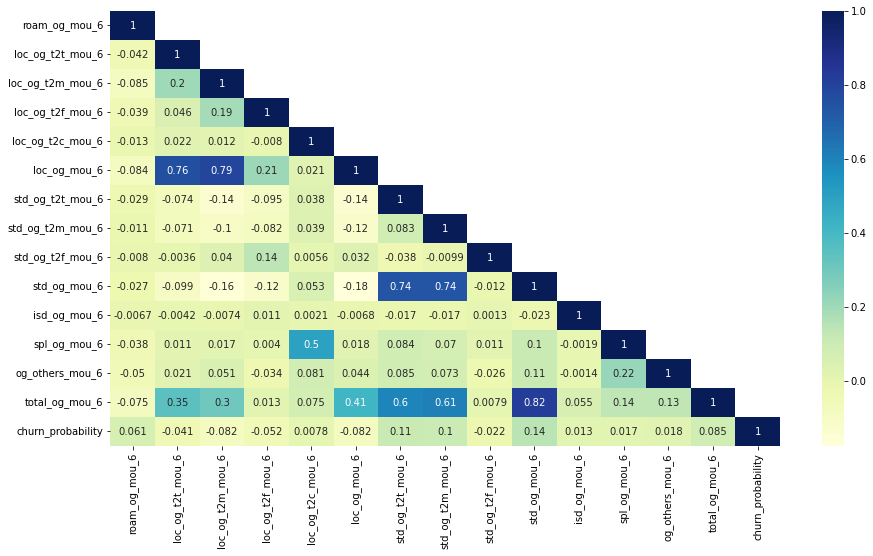

In [40]:
# Get list of Outgoing calls MOU for month 6
list_of_columns = tc_df.columns[tc_df.columns.str.contains('.*og_.*mou_6', regex=True)]
plot_corr_matrix(tc_df, list_of_columns)

**Observation** : Looking at the correlation matrix, we can clearly see that some features are highly correlated to one feature. By an assumption of domain knowledge, we can expect below points to be true.

* loc_og_mou_6 is equivalent to sum of loc_og_t2t_mou_6, loc_og_t2m_mou_6 and loc_og_t2f_mou_6
* std_og_mou_6 is equivalent to sum of std_og_t2t_mou_6, std_og_t2m_mou_6 and std_og_t2f_mou_6
* total_og_mou_6 is equivalent to sum of loc_og_mou_6, std_og_mou_6, isd_og_mou_6, spl_og_mou_6 and og_others_mou_6
* Remove loc_og_t2c_mou_6 have very less correlation with churn_probability, hence we will remove this feature.

We will verify the above points for confirmation and then delete the correlated feature.

In [41]:
# Check sum of OG of t2t, t2m and t2f MOU is similar to OG MOU for Local Calls
print('There are {0} entries in dataframe where difference of OG MOU is not similar to sum of OG\'s within T2T, T2M, T2F for Local Calls'
      .format(len(tc_df[(tc_df['loc_og_mou_6'] - (tc_df['loc_og_t2t_mou_6'] + tc_df['loc_og_t2m_mou_6'] + 
                                                  tc_df['loc_og_t2f_mou_6'])) > 1])))

There are 0 entries in dataframe where difference of OG MOU is not similar to sum of OG's within T2T, T2M, T2F for Local Calls


In [42]:
# Check sum of OG of t2t, t2m and t2f MOU is similar to OG MOU for STD Calls
print('There are {0} entries in dataframe where difference of OG MOU is not similar to sum of OG\'s within T2T, T2M, T2F for STD Calls'
      .format(len(tc_df[(tc_df['std_og_mou_6'] - (tc_df['std_og_t2t_mou_6'] + tc_df['std_og_t2m_mou_6'] + 
                                                  tc_df['std_og_t2f_mou_6'])) > 1])))

There are 0 entries in dataframe where difference of OG MOU is not similar to sum of OG's within T2T, T2M, T2F for STD Calls


In [43]:
# Check sum of OG of local, STD, ISD, Special and Others MOU is similar to Total OG MOU
print('There are {0} entries in dataframe where difference of Total OG MOU is not similar to sum of OG\'s of local, STD, ISD, Special and Others MOU'
      .format(len(tc_df[(tc_df['total_og_mou_6'] - (tc_df['loc_og_mou_6'] + tc_df['std_og_mou_6'] + tc_df['isd_og_mou_6']
                                                    + tc_df['spl_og_mou_6'] + tc_df['og_others_mou_6'])) > 1])))

There are 0 entries in dataframe where difference of Total OG MOU is not similar to sum of OG's of local, STD, ISD, Special and Others MOU


#### Incoming calls MOU for month 6

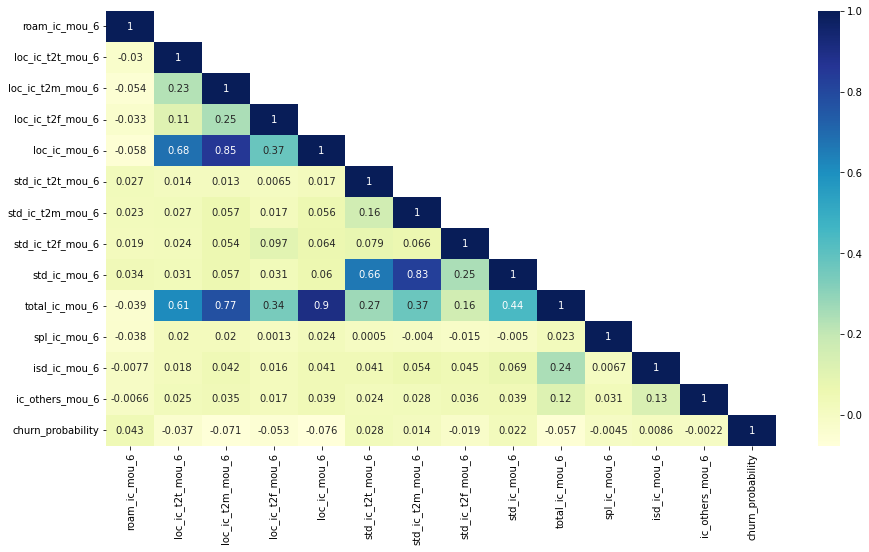

In [44]:
# Get list of Incoming calls MOU for month 6
list_of_columns = tc_df.columns[tc_df.columns.str.contains('.*ic_.*mou_6', regex=True)]
plot_corr_matrix(tc_df, list_of_columns)

**Observation** : Looking at the correlation matrix, we can clearly see that some features are highly correlated to one feature. By an assumption of domain knowledge, we can expect below points to be true.

* loc_ic_mou_6 is equivalent to sum of loc_ic_t2t_mou_6, loc_ic_t2m_mou_6 and loc_ic_t2f_mou_6
* std_ic_mou_6 is equivalent to sum of std_ic_t2t_mou_6, std_ic_t2m_mou_6 and std_ic_t2f_mou_6
* total_ic_mou_6 is equivalent to sum of loc_ic_mou_6, std_ic_mou_6, isd_ic_mou_6, spl_ic_mou_6 and ic_others_mou_6
* Remove spl_ic_mou_6, isd_ic_mou_6, ic_others_mou_6 have very less correlation with churn_probability, hence we will remove these features.

We will verify the above points for confirmation and then delete the correlated feature.

In [45]:
# Check sum of IC of t2t, t2m and t2f MOU is similar to IC MOU for Local Calls
print('There are {0} entries in dataframe where difference of IC MOU is not similar to sum of IC\'s within T2T, T2M, T2F for Local Calls'
      .format(len(tc_df[(tc_df['loc_ic_mou_6'] - (tc_df['loc_ic_t2t_mou_6'] + tc_df['loc_ic_t2m_mou_6'] + 
                                                  tc_df['loc_ic_t2f_mou_6'])) > 1])))

There are 0 entries in dataframe where difference of IC MOU is not similar to sum of IC's within T2T, T2M, T2F for Local Calls


In [46]:
# Check sum of IC of t2t, t2m and t2f MOU is similar to IC MOU for STD Calls
print('There are {0} entries in dataframe where difference of IC MOU is not similar to sum of IC\'s within T2T, T2M, T2F for STD Calls'
      .format(len(tc_df[(tc_df['std_ic_mou_6'] - (tc_df['std_ic_t2t_mou_6'] + tc_df['std_ic_t2m_mou_6'] + 
                                                  tc_df['std_ic_t2f_mou_6'])) > 1])))

There are 0 entries in dataframe where difference of IC MOU is not similar to sum of IC's within T2T, T2M, T2F for STD Calls


In [47]:
# Check sum of IC of local, STD, ISD, Special and Others MOU is similar to Total IC MOU
print('There are {0} entries in dataframe where difference of Total IC MOU is not similar to sum of IC\'s of local, STD, ISD, Special and Others MOU'
      .format(len(tc_df[(tc_df['total_ic_mou_6'] - (tc_df['loc_ic_mou_6'] + tc_df['std_ic_mou_6'] + tc_df['isd_ic_mou_6']
                                                    + tc_df['spl_ic_mou_6'] + tc_df['ic_others_mou_6'])) > 1])))

There are 0 entries in dataframe where difference of Total IC MOU is not similar to sum of IC's of local, STD, ISD, Special and Others MOU


**Observation** : So our assumption is correct. Same is applicable for month 7 and 8. Let's remove these features from dataset after analysing their respective churn ratio and correlation

#### Outgoing calls MOU for month 7

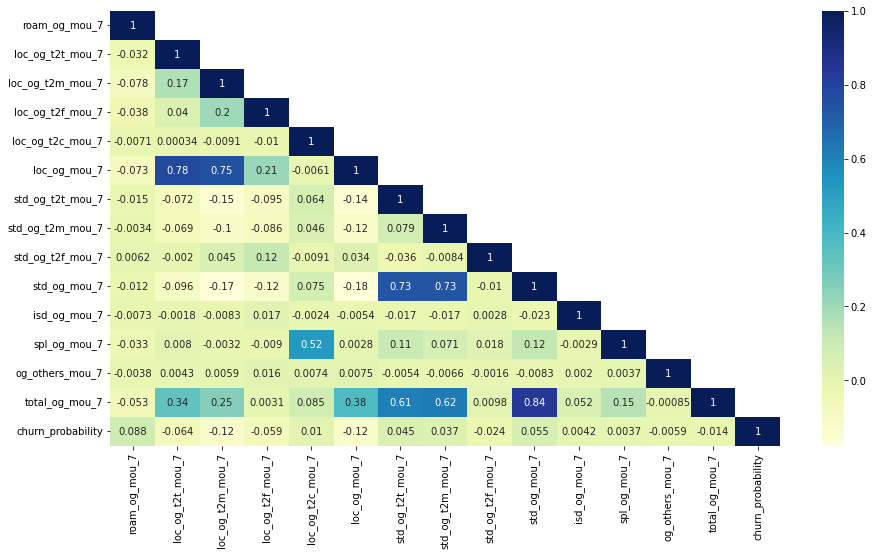

In [48]:
# Get list of Outgoing calls MOU for month 7
list_of_columns = tc_df.columns[tc_df.columns.str.contains('.*og_.*mou_7', regex=True)]
plot_corr_matrix(tc_df, list_of_columns)

**Observation** : Looking at the correlation matrix, we can clearly see that some features are highly correlated to one feature.

* Remove isd_og_mou_7, spl_og_mou_7, og_others_mou_7 have very less correlation with churn_probability, hence we will remove these features.

#### Incoming calls MOU for month 7

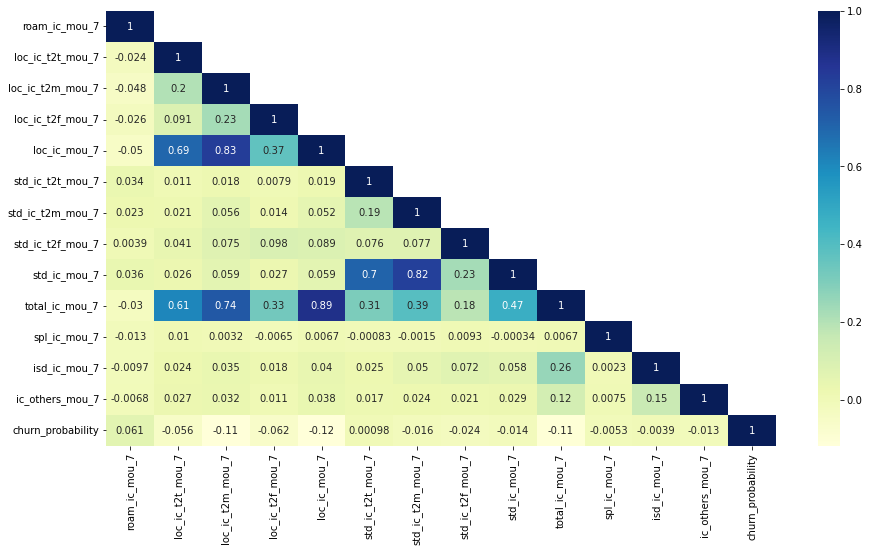

In [49]:
# Get list of Incoming calls MOU for month 7
list_of_columns = tc_df.columns[tc_df.columns.str.contains('.*ic_.*mou_7', regex=True)]
plot_corr_matrix(tc_df, list_of_columns)

**Observation** : Looking at the correlation matrix, we can clearly see that some features are highly correlated to one feature.

* Remove std_ic_t2t_mou_7, spl_ic_mou_7, isd_ic_mou_7 have very less correlation with churn_probability, hence we will remove this feature.

#### Outgoing calls MOU for month 8

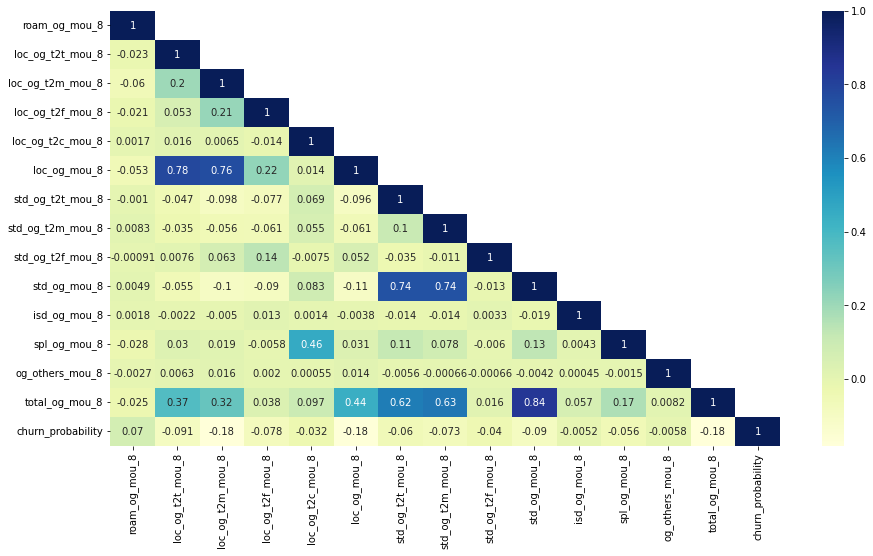

In [50]:
# Get list of Outgoing calls MOU for month 8
list_of_columns = tc_df.columns[tc_df.columns.str.contains('.*og_.*mou_8', regex=True)]
plot_corr_matrix(tc_df, list_of_columns)

**Observation** : Looking at the correlation matrix, we can clearly see that some features are highly correlated to one feature.

* Remove isd_og_mou_8, og_others_mou_8 have very less correlation with churn_probability, hence we will remove these features.

#### Incoming calls MOU for month 8

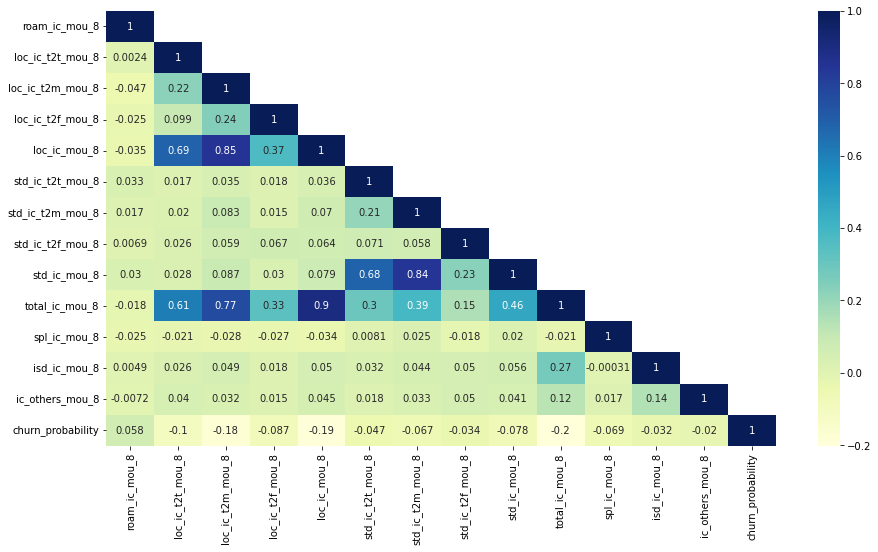

In [51]:
# Get list of Incoming calls MOU for month 8
list_of_columns = tc_df.columns[tc_df.columns.str.contains('.*ic_.*mou_8', regex=True)]
plot_corr_matrix(tc_df, list_of_columns)

**Observation** : Looking at the correlation matrix, we can clearly see that some features are highly correlated to one feature.

In [52]:
# Function to plot bar chart of list of columns based on churning probability
bar_color_code = 0
bar_color_list = ['flare', 'crest']

def bar_plot(df, list_of_columns):
    global bar_color_code
    hlen = len(list_of_columns)
    temp_df = pd.DataFrame()
    temp_df['No Churn'] = tc_df[tc_df['churn_probability'] == 0][list_of_columns].mean()
    temp_df['Churn'] = tc_df[tc_df['churn_probability'] == 1][list_of_columns].mean()
    temp_df.plot.bar(rot=0, figsize=(hlen * 2,5), colormap=bar_color_list[bar_color_code])
    bar_color_code += 1
    bar_color_code %= 2
    plt.show()

In [53]:
# Function to plot boxplot of list of columns based on churning probability
box_color_code = 0
box_color_list = ['flare', 'crest']

def box_plot(df, pattern):
    global box_color_code
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,5))
    sns.violinplot(y=pattern+'6', x='churn_probability', data=df, ax = axes[0])
    sns.violinplot(y=pattern+'7', x='churn_probability', data=df, ax = axes[1])
    sns.violinplot(y=pattern+'8', x='churn_probability', data=df, ax = axes[2])
    box_color_code += 1
    box_color_code %= 2
    plt.show()

In [54]:
# Function to display correlation of given columns with target variable
def display_correlation(df, list_of_columns):
    list_of_columns += ['churn_probability']
    corr_matrix = df[list_of_columns].corr()
    return corr_matrix

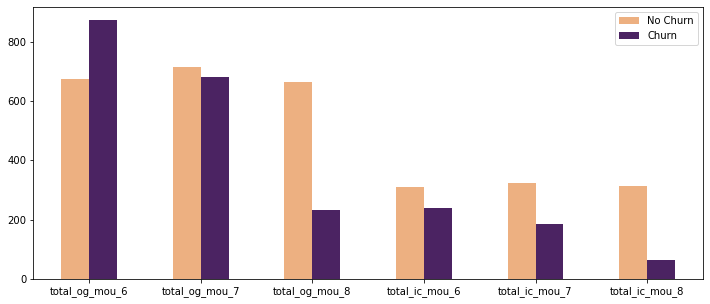

,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,churn_probability
total_og_mou_6,1.0000,0.6423,0.4884,0.1186,0.0399,0.0165,0.0847
total_og_mou_7,0.6423,1.0000,0.7402,-0.0023,0.0914,0.0591,-0.0142
total_og_mou_8,0.4884,0.7402,1.0000,0.0119,0.0787,0.1607,-0.1777
total_ic_mou_6,0.1186,-0.0023,0.0119,1.0000,0.7781,0.6917,-0.0570
total_ic_mou_7,0.0399,0.0914,0.0787,0.7781,1.0000,0.8129,-0.1078
total_ic_mou_8,0.0165,0.0591,0.1607,0.6917,0.8129,1.0000,-0.2012
churn_probability,0.0847,-0.0142,-0.1777,-0.0570,-0.1078,-0.2012,1.0000


In [55]:
# Display barplot of Total Outgoing and Incoming calls MOU for all months
list_of_columns = ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
                   'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']
bar_plot(tc_df, list_of_columns)
display_correlation(tc_df, list_of_columns)

**Observation** : We can see outgoing calls drastically decreasing during different months for customers who churned.
Incoming calls have less role during 6th and 7th month, while 8th month indicates a definite decrease.

This clearly indicates that the customer who churned will definitely stop outgoing and incoming calls.

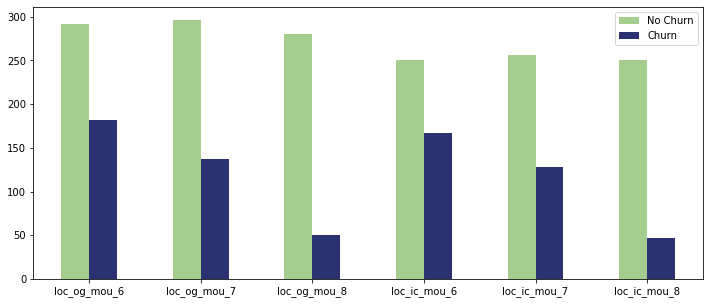

,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,churn_probability
loc_og_mou_6,1.0000,0.7970,0.7269,0.4555,0.3890,0.3685,-0.0819
loc_og_mou_7,0.7970,1.0000,0.8342,0.3659,0.4298,0.3986,-0.1207
loc_og_mou_8,0.7269,0.8342,1.0000,0.3384,0.3824,0.4512,-0.1771
loc_ic_mou_6,0.4555,0.3659,0.3384,1.0000,0.7970,0.7236,-0.0764
loc_ic_mou_7,0.3890,0.4298,0.3824,0.7970,1.0000,0.8313,-0.1185
loc_ic_mou_8,0.3685,0.3986,0.4512,0.7236,0.8313,1.0000,-0.1924
churn_probability,-0.0819,-0.1207,-0.1771,-0.0764,-0.1185,-0.1924,1.0000


In [56]:
# Display barplot of Local Outgoing and Incoming calls MOU for all months
list_of_columns = ['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8',
                   'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8']
bar_plot(tc_df, list_of_columns)
display_correlation(tc_df, list_of_columns)

**Observation** : Local outgoing and incoming call decreases at same rate for customers who churned.

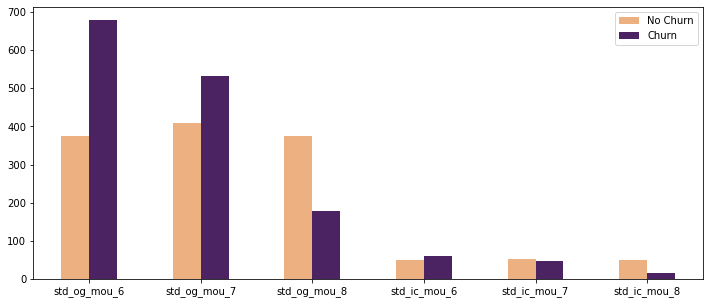

,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,churn_probability
std_og_mou_6,1.0000,0.7040,0.5449,0.1252,0.0667,0.0518,0.1418
std_og_mou_7,0.7040,1.0000,0.7752,0.0675,0.1215,0.1028,0.0551
std_og_mou_8,0.5449,0.7752,1.0000,0.0532,0.0915,0.1472,-0.0902
std_ic_mou_6,0.1252,0.0675,0.0532,1.0000,0.7278,0.5823,0.0219
std_ic_mou_7,0.0667,0.1215,0.0915,0.7278,1.0000,0.7414,-0.0137
std_ic_mou_8,0.0518,0.1028,0.1472,0.5823,0.7414,1.0000,-0.0778
churn_probability,0.1418,0.0551,-0.0902,0.0219,-0.0137,-0.0778,1.0000


In [57]:
# Display barplot of STD Outgoing and Incoming calls MOU for all months
list_of_columns = ['std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
                   'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8']
bar_plot(tc_df, list_of_columns)
display_correlation(tc_df, list_of_columns)

**Observation** : STD outgoing calls decreases more than incoming calls for customers who churned.

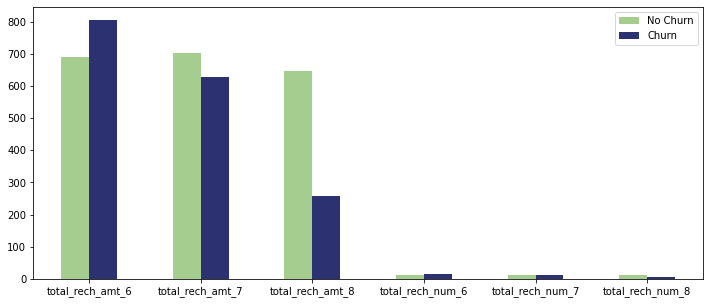

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,churn_probability
total_rech_amt_6,1.0000,0.5988,0.5902,0.3050,0.0703,0.0700,0.0592
total_rech_amt_7,0.5988,1.0000,0.7216,0.1013,0.2672,0.1826,-0.0363
total_rech_amt_8,0.5902,0.7216,1.0000,0.0824,0.1661,0.3366,-0.1768
total_rech_num_6,0.3050,0.1013,0.0824,1.0000,0.6788,0.5581,0.0645
total_rech_num_7,0.0703,0.2672,0.1661,0.6788,1.0000,0.7611,-0.0176
total_rech_num_8,0.0700,0.1826,0.3366,0.5581,0.7611,1.0000,-0.1567
churn_probability,0.0592,-0.0363,-0.1768,0.0645,-0.0176,-0.1567,1.0000


In [58]:
# Display barplot of Total number of times recharged and total recharge amount for all months
list_of_columns = ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
                   'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8']
bar_plot(tc_df, list_of_columns)
display_correlation(tc_df, list_of_columns)

**Observation** : Total recharge amount decreases for customers who churned. While total number of recharge done plays less role when numbers are compared, hence we will drop this feature.

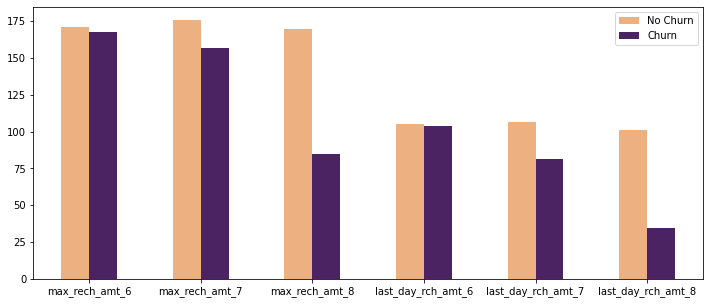

,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,churn_probability
max_rech_amt_6,1.0000,0.4607,0.5743,0.6625,0.3040,0.3917,-0.0055
max_rech_amt_7,0.4607,1.0000,0.5384,0.3318,0.6326,0.3829,-0.0309
max_rech_amt_8,0.5743,0.5384,1.0000,0.4198,0.3707,0.6836,-0.1437
last_day_rch_amt_6,0.6625,0.3318,0.4198,1.0000,0.3037,0.3472,-0.0025
last_day_rch_amt_7,0.3040,0.6326,0.3707,0.3037,1.0000,0.3265,-0.0519
last_day_rch_amt_8,0.3917,0.3829,0.6836,0.3472,0.3265,1.0000,-0.1349
churn_probability,-0.0055,-0.0309,-0.1437,-0.0025,-0.0519,-0.1349,1.0000


In [59]:
# Display barplot of MAX recharge amount and Last day recharge amount for all months
list_of_columns = ['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
                   'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8']
bar_plot(tc_df, list_of_columns)
display_correlation(tc_df, list_of_columns)

**Observation** : We can see a definite decrease in recharge done in 8th month for customers who churned.

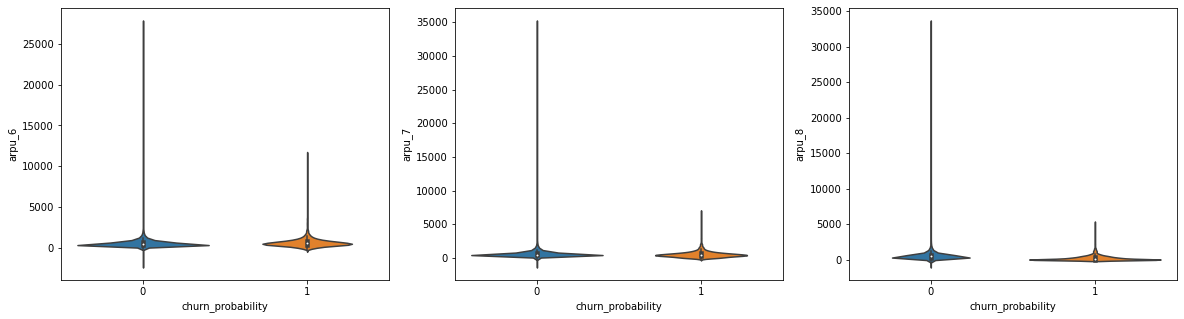

In [60]:
# Plot boxplot of Average Revenue per User for all months
box_plot(tc_df, 'arpu_')

In [61]:
# Display correlation of Average Revenue per User for all months with churn rate
list_of_columns = ['arpu_6', 'arpu_7', 'arpu_8']
display_correlation(tc_df, list_of_columns)

,arpu_6,arpu_7,arpu_8,churn_probability
arpu_6,1.0000,0.6599,0.5907,0.0589
arpu_7,0.6599,1.0000,0.7643,-0.0305
arpu_8,0.5907,0.7643,1.0000,-0.1779
churn_probability,0.0589,-0.0305,-0.1779,1.0000


**Observation**
* There are lot of outliers present. Since we deal with HVC, we can't remove any such entry with very high revenue.
* Spread is less for 8th month
* Churn rate for 6th month is concentrated on Median
* Each feature is correlated with churn rate at a good amount.

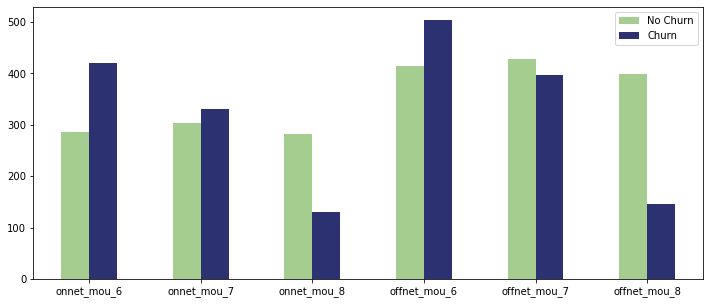

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,churn_probability
onnet_mou_6,1.0000,0.7170,0.5926,0.0078,-0.0520,-0.0430,0.0811
onnet_mou_7,0.7170,1.0000,0.7944,-0.0367,-0.0003,-0.0007,0.0153
onnet_mou_8,0.5926,0.7944,1.0000,-0.0164,0.0147,0.0676,-0.0904
offnet_mou_6,0.0078,-0.0367,-0.0164,1.0000,0.6932,0.5232,0.0542
offnet_mou_7,-0.0520,-0.0003,0.0147,0.6932,1.0000,0.7406,-0.0184
offnet_mou_8,-0.0430,-0.0007,0.0676,0.5232,0.7406,1.0000,-0.1514
churn_probability,0.0811,0.0153,-0.0904,0.0542,-0.0184,-0.1514,1.0000


In [62]:
# Display barplot of Calls made within same network operator and different network operator for all months
list_of_columns = ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
                   'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8']
bar_plot(tc_df, list_of_columns)
display_correlation(tc_df, list_of_columns)

**Observation** : We can see a definite decrease of calls made within same and different operator in 8th month for customers who churned.

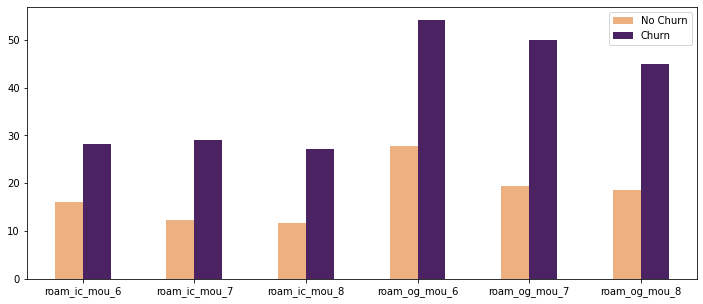

,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,churn_probability
roam_ic_mou_6,1.0000,0.4890,0.3736,0.6365,0.3536,0.2261,0.0434
roam_ic_mou_7,0.4890,1.0000,0.6234,0.2980,0.5912,0.3484,0.0607
roam_ic_mou_8,0.3736,0.6234,1.0000,0.2097,0.3757,0.5182,0.0582
roam_og_mou_6,0.6365,0.2980,0.2097,1.0000,0.5224,0.3807,0.0612
roam_og_mou_7,0.3536,0.5912,0.3757,0.5224,1.0000,0.6199,0.0879
roam_og_mou_8,0.2261,0.3484,0.5182,0.3807,0.6199,1.0000,0.0703
churn_probability,0.0434,0.0607,0.0582,0.0612,0.0879,0.0703,1.0000


In [63]:
# Display barplot of MOU of incoming and outgoing calls for all months when customer was roaming
list_of_columns = ['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
                   'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8']
bar_plot(tc_df, list_of_columns)
display_correlation(tc_df, list_of_columns)

**Observation** : Roaming outgoing calls have some impact and can see a slight decrease per month for customers who churned. While incoming calls have slight variation and during 7th month, it actually increase. Hence we will remove this MOU feature.

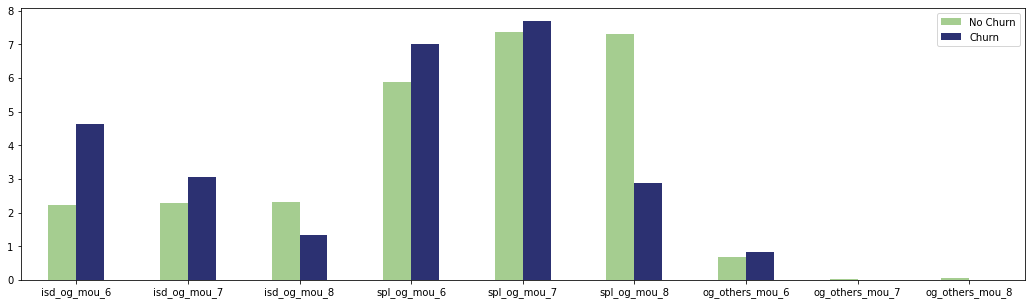

,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_mou_6,og_others_mou_7,og_others_mou_8,churn_probability
isd_og_mou_6,1.0000,0.9359,9.3265e-01,-0.0019,-0.0055,-0.0028,-1.4036e-03,3.9900e-03,0.0018,0.0129
isd_og_mou_7,0.9359,1.0000,9.5507e-01,-0.0036,-0.0029,-0.0033,-2.0152e-03,2.0218e-03,0.0014,0.0042
isd_og_mou_8,0.9326,0.9551,1.0000e+00,-0.0017,0.0033,0.0043,-1.4553e-05,-6.1469e-05,0.0005,-0.0052
spl_og_mou_6,-0.0019,-0.0036,-1.7086e-03,1.0000,0.5636,0.3835,2.1592e-01,5.6650e-03,0.0035,0.0170
spl_og_mou_7,-0.0055,-0.0029,3.2714e-03,0.5636,1.0000,0.5655,1.9821e-01,3.6509e-03,-0.0016,0.0037
spl_og_mou_8,-0.0028,-0.0033,4.2564e-03,0.3835,0.5655,1.0000,1.4466e-01,5.1312e-04,-0.0015,-0.0559
og_others_mou_6,-0.0014,-0.0020,-1.4553e-05,0.2159,0.1982,0.1447,1.0000e+00,4.1208e-02,0.1639,0.0180
og_others_mou_7,0.0040,0.0020,-6.1469e-05,0.0057,0.0037,0.0005,4.1208e-02,1.0000e+00,0.2434,-0.0059
og_others_mou_8,0.0018,0.0014,4.5334e-04,0.0035,-0.0016,-0.0015,1.6390e-01,2.4342e-01,1.0000,-0.0058
churn_probability,0.0129,0.0042,-5.2238e-03,0.0170,0.0037,-0.0559,1.7958e-02,-5.8713e-03,-0.0058,1.0000


In [64]:
# Display barplot of ISD, Special and Other feature outgoing MOU for all months
list_of_columns = ['isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
                   'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
                   'og_others_mou_6', 'og_others_mou_7', 'og_others_mou_8']
bar_plot(tc_df, list_of_columns)
display_correlation(tc_df, list_of_columns)

**Observation** : ISD outgoing calls have some impact and can see a slight decrease per month for customers who churned. While special calls MOU increased during 7th month, hence we can't imply this as a good feature. Other calls MOU plays very less role in prediction, so we will remove these features as well.

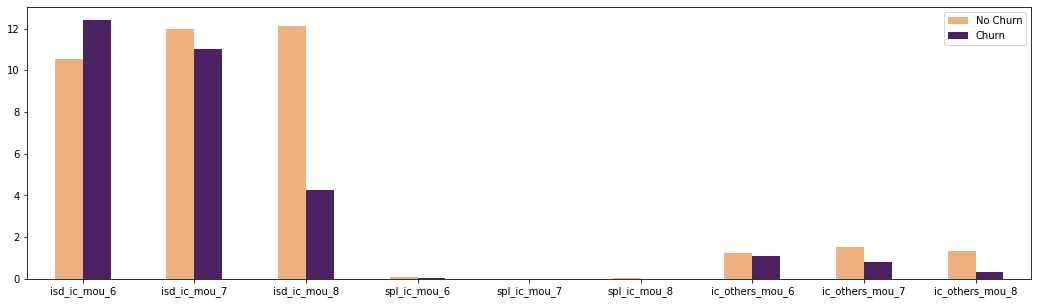

,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,ic_others_mou_6,ic_others_mou_7,ic_others_mou_8,churn_probability
isd_ic_mou_6,1.0000,0.7567,0.5967,0.0067,0.0016,-0.0149,0.1297,0.1403,0.0951,0.0086
isd_ic_mou_7,0.7567,1.0000,0.7376,0.0014,0.0023,0.0015,0.1053,0.1481,0.1213,-0.0039
isd_ic_mou_8,0.5967,0.7376,1.0000,-0.0017,0.0066,-0.0003,0.0882,0.1294,0.1449,-0.0317
spl_ic_mou_6,0.0067,0.0014,-0.0017,1.0000,0.5184,0.1393,0.0310,0.0290,0.0250,-0.0045
spl_ic_mou_7,0.0016,0.0023,0.0066,0.5184,1.0000,0.0484,0.0136,0.0075,0.0221,-0.0053
spl_ic_mou_8,-0.0149,0.0015,-0.0003,0.1393,0.0484,1.0000,0.0104,0.0198,0.0169,-0.0690
ic_others_mou_6,0.1297,0.1053,0.0882,0.0310,0.0136,0.0104,1.0000,0.7420,0.6811,-0.0022
ic_others_mou_7,0.1403,0.1481,0.1294,0.0290,0.0075,0.0198,0.7420,1.0000,0.7992,-0.0128
ic_others_mou_8,0.0951,0.1213,0.1449,0.0250,0.0221,0.0169,0.6811,0.7992,1.0000,-0.0201
churn_probability,0.0086,-0.0039,-0.0317,-0.0045,-0.0053,-0.0690,-0.0022,-0.0128,-0.0201,1.0000


In [65]:
# Display barplot of ISD, Special and Other feature incoming MOU for all months
list_of_columns = ['isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8',
                   'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8',
                   'ic_others_mou_6', 'ic_others_mou_7', 'ic_others_mou_8']
bar_plot(tc_df, list_of_columns)
display_correlation(tc_df, list_of_columns)

**Observation** : ISD incoming calls have some impact and can see a slight decrease per month for customers who churned. While special calls MOU and other calls MOU decreased slightly, we will remove these features as numbers are very less for predicting churn probability.

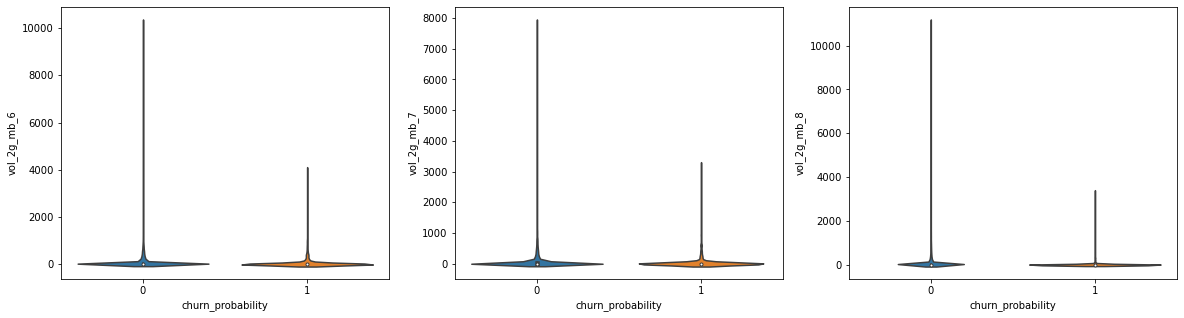

,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,churn_probability
vol_2g_mb_6,1.0000,0.6746,0.5110,-0.0286
vol_2g_mb_7,0.6746,1.0000,0.6704,-0.0360
vol_2g_mb_8,0.5110,0.6704,1.0000,-0.0620
churn_probability,-0.0286,-0.0360,-0.0620,1.0000


In [66]:
# Plot boxplot of 2G Internet usage for all months
box_plot(tc_df, 'vol_2g_mb_')
list_of_columns = ['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8']
display_correlation(tc_df, list_of_columns)

**Observation**
* 2G internet usage is negatively correlated.
* Spread is very less and gradually it is decreased.

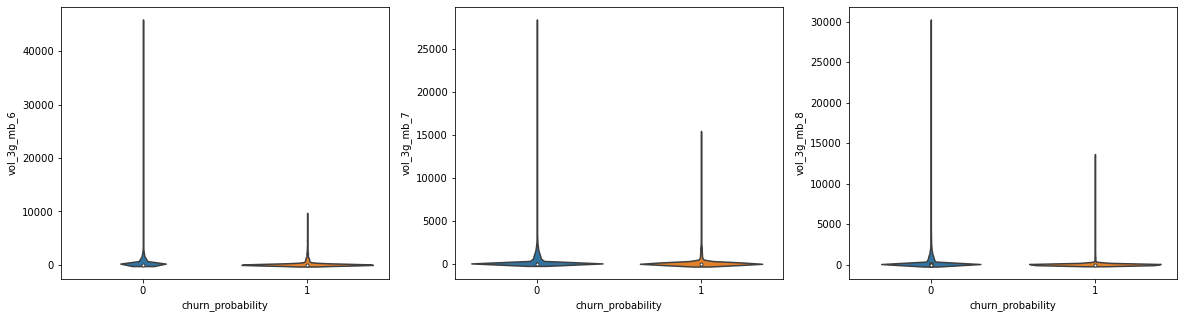

,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,churn_probability
vol_3g_mb_6,1.0000,0.7104,0.6657,-0.0224
vol_3g_mb_7,0.7104,1.0000,0.7461,-0.0429
vol_3g_mb_8,0.6657,0.7461,1.0000,-0.0744
churn_probability,-0.0224,-0.0429,-0.0744,1.0000


In [67]:
# Plot boxplot of 3G Internet usage for all months
box_plot(tc_df, 'vol_3g_mb_')
list_of_columns = ['vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8']
display_correlation(tc_df, list_of_columns)

**Observation**
* 3G internet usage is negatively correlated.
* Spread is very less and gradually it is decreased, eventhough it increased slightly for month 7.

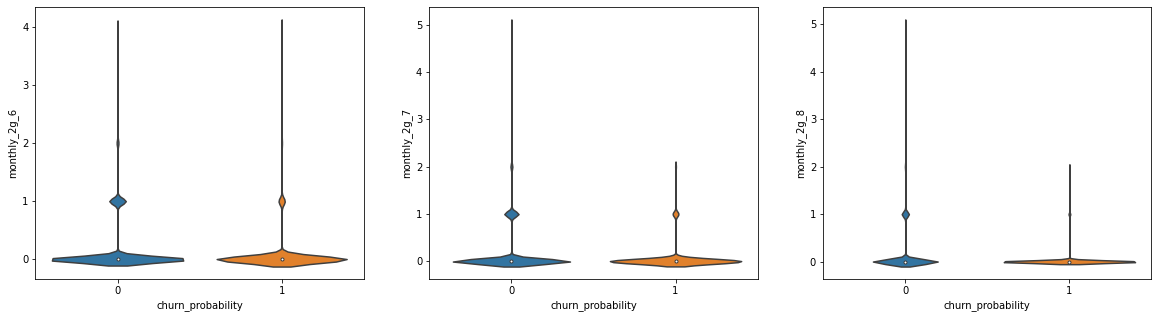

,monthly_2g_6,monthly_2g_7,monthly_2g_8,churn_probability
monthly_2g_6,1.0000,0.5544,0.5179,-0.0544
monthly_2g_7,0.5544,1.0000,0.5445,-0.0643
monthly_2g_8,0.5179,0.5445,1.0000,-0.0876
churn_probability,-0.0544,-0.0643,-0.0876,1.0000


In [68]:
# Plot boxplot of 2G Monthly usage for all months
box_plot(tc_df, 'monthly_2g_')
list_of_columns = ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8']
display_correlation(tc_df, list_of_columns)

**Observation**
* 2G monthly usage is negatively correlated.
* Spread is very less and gradually it is decreased.

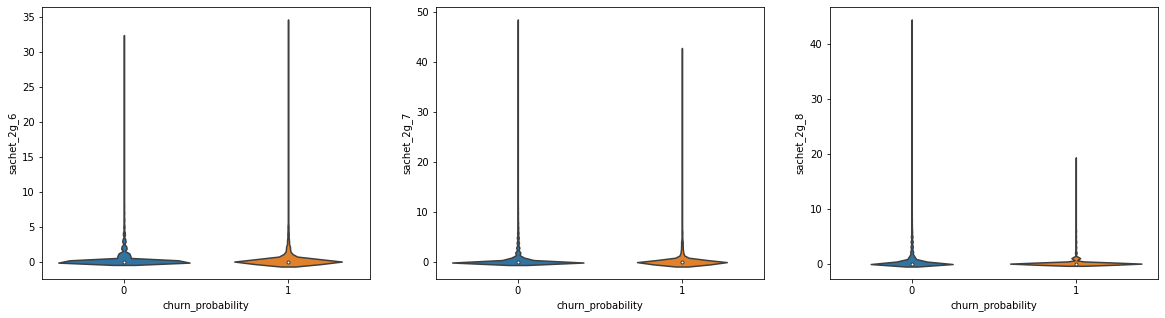

,sachet_2g_6,sachet_2g_7,sachet_2g_8,churn_probability
sachet_2g_6,1.0000,0.7246,0.5682,-0.0151
sachet_2g_7,0.7246,1.0000,0.6726,-0.0235
sachet_2g_8,0.5682,0.6726,1.0000,-0.0696
churn_probability,-0.0151,-0.0235,-0.0696,1.0000


In [69]:
# Plot boxplot of 2G Sachet usage for all months
box_plot(tc_df, 'sachet_2g_')
list_of_columns = ['sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8']
display_correlation(tc_df, list_of_columns)

**Observation**
* 2G sachet usage is negatively correlated.
* Spread is very less and gradually it is decreased.

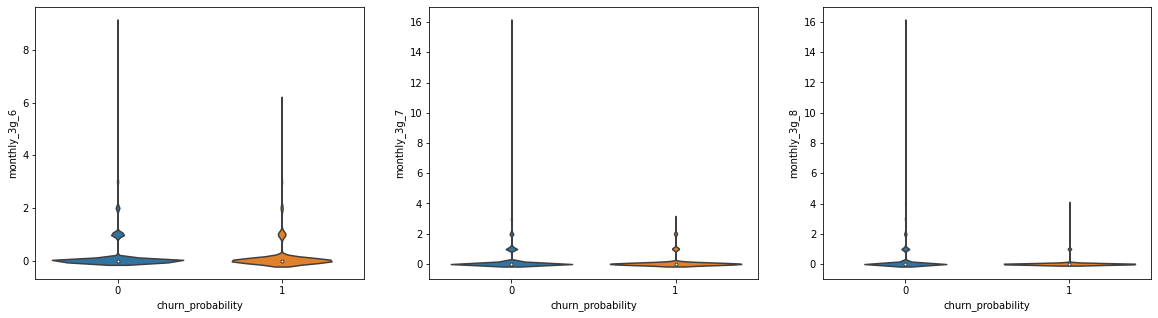

,monthly_3g_6,monthly_3g_7,monthly_3g_8,churn_probability
monthly_3g_6,1.0000,0.6308,0.5676,-0.0198
monthly_3g_7,0.6308,1.0000,0.6652,-0.0418
monthly_3g_8,0.5676,0.6652,1.0000,-0.0718
churn_probability,-0.0198,-0.0418,-0.0718,1.0000


In [70]:
# Plot boxplot of 3G Monthly usage for all months
box_plot(tc_df, 'monthly_3g_')
list_of_columns = ['monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8']
display_correlation(tc_df, list_of_columns)

**Observation**
* 3G monthly usage is negatively correlated.
* Spread is very less and gradually it is decreased.

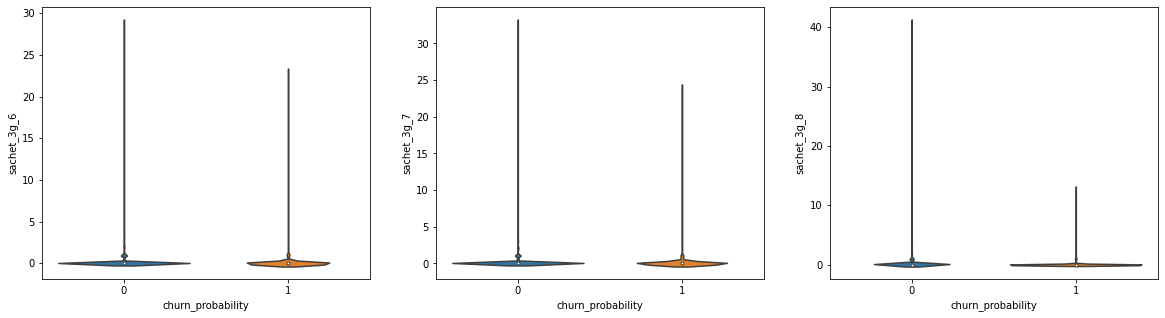

,sachet_3g_6,sachet_3g_7,sachet_3g_8,churn_probability
sachet_3g_6,1.0000,0.6917,0.5326,-0.0081
sachet_3g_7,0.6917,1.0000,0.7022,-0.0088
sachet_3g_8,0.5326,0.7022,1.0000,-0.0317
churn_probability,-0.0081,-0.0088,-0.0317,1.0000


In [71]:
# Plot boxplot of 3G Sachet usage for all months
box_plot(tc_df, 'sachet_3g_')
list_of_columns = ['sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']
display_correlation(tc_df, list_of_columns)

**Observation**
* 3G sachet usage is negatively correlated.
* Spread is very less and gradually it is decreased.

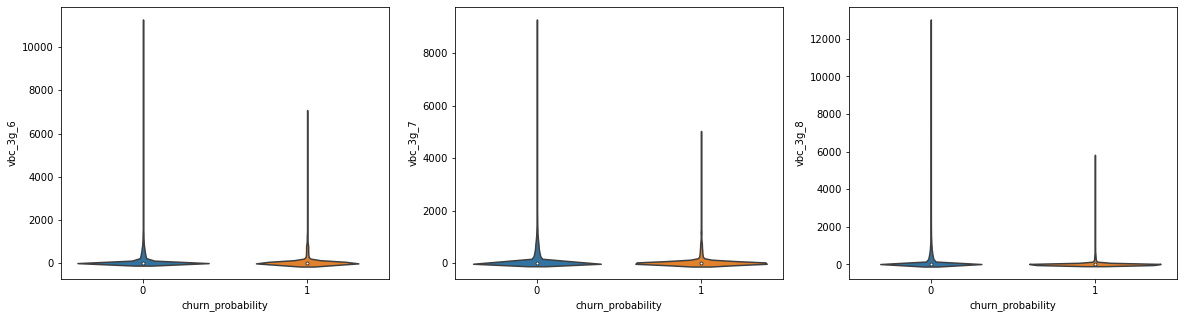

,vbc_3g_6,vbc_3g_7,vbc_3g_8,churn_probability
vbc_3g_6,1.0000,0.6816,0.5869,-0.0287
vbc_3g_7,0.6816,1.0000,0.7053,-0.0490
vbc_3g_8,0.5869,0.7053,1.0000,-0.0757
churn_probability,-0.0287,-0.0490,-0.0757,1.0000


In [72]:
# Plot boxplot of Volume Based Cost for no specific scheme for all months
box_plot(tc_df, 'vbc_3g_')
list_of_columns = ['vbc_3g_6', 'vbc_3g_7', 'vbc_3g_8']
display_correlation(tc_df, list_of_columns)

**Observation**
* Features are negatively correlated.
* Spread is very less and gradually it is decreased.

### Derive New Feature

In [73]:
# Age on Network (AON), is a term used in telecom to indicate duration (days) for which the user has been a customer of the 
# particular operator / network.
# Calculate duration in months by dividing AON by 30 (average days in a month)
tc_df['duration'] = tc_df['aon'] / 30
# Check the percentile and min-max of duration column
tc_df['duration'].describe()

count    20951.0000
mean        42.2600
std         32.4338
min          6.0000
25%         16.0000
50%         30.8667
75%         64.7333
max        144.0333
Name: duration, dtype: float64

In [74]:
# We can see min-max value range and we will divide this feature into various buckets for better prediction
tc_df['aon_bucket'] = pd.cut(tc_df['duration'],
                             [0, 6, 12, 24, 60, 156],
                             labels = ['0-6 months', '6-12 months', '1-2 years', '2-5 years', '5+ years'])

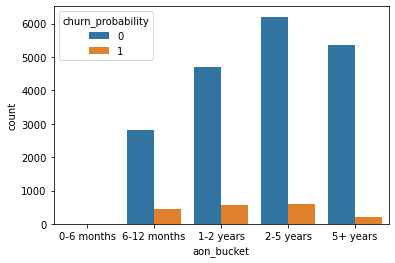

In [75]:
# Plot countplot of aon_bucket with churning probability.
sns.countplot(x='aon_bucket', hue='churn_probability', data=tc_df)
plt.show()

**Observation** : Definitely we can see that customers who are continuing the service for more than 5+ years, will churn less. And more customers churned with in 5 years of telecom service.

### Dummy Variable Encoding

In [76]:
# Create dummy for all categorical variables
# Store it in a new data frame - 'dummy_df'.
dummy_df = pd.get_dummies(tc_df['aon_bucket'], drop_first = True)

# Check how 'dummy_df' data frame looks like
dummy_df.head()

,6-12 months,1-2 years,2-5 years,5+ years
12,1,0,0,0
15,0,1,0,0
23,0,1,0,0
24,0,0,1,0
25,0,0,0,1


In [77]:
# Check size of dummy dataframe
print('Dummy dataframe have {0} rows and {1} columns'.format(dummy_df.shape[0], dummy_df.shape[1]))

Dummy dataframe have 20951 rows and 4 columns


In [78]:
# Add the dummy dataframe to the original Telecom Churn dataframe
tc_df = pd.concat([tc_df, dummy_df], axis = 1)

In [79]:
# Drop columns as we have created the dummies for it
# Remove columns aon and duration as well
list_of_columns = ['aon_bucket', 'aon', 'duration']
tc_df.drop(labels = list_of_columns, axis = 1, inplace = True)
dropped_columns += list_of_columns

In [80]:
# Check correlation
list_of_columns = ['6-12 months', '1-2 years', '2-5 years', '5+ years']
display_correlation(tc_df, list_of_columns)

,6-12 months,1-2 years,2-5 years,5+ years,churn_probability
6-12 months,1.0000,-0.2495,-0.2980,-0.2588,0.0756
1-2 years,-0.2495,1.0000,-0.4033,-0.3502,0.0429
2-5 years,-0.2980,-0.4033,1.0000,-0.4183,0.0012
5+ years,-0.2588,-0.3502,-0.4183,1.0000,-0.1058
churn_probability,0.0756,0.0429,0.0012,-0.1058,1.0000


**Observation** - As seen in bar plot, we can see how **Loyal Customers** (continuing service for more than 5+ years) tends to churn less. We will remove 2-5 years feature as it have less correlation.

In [81]:
# Remove summation features and average (6 & 7) recharge amount from dataset
list_of_columns = ['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8',
                   'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
                   'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
                   'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8',
                   'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8',
                   'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
                   'avg_rech_amt_6_7']
tc_df.drop(labels = list_of_columns, axis = 1, inplace = True)
dropped_columns += list_of_columns

In [82]:
# Remove low correlated (when compared to churn rate) features from dataset
list_of_columns = ['loc_og_t2c_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6',
                   'ic_others_mou_6', 'isd_og_mou_7', 'spl_og_mou_7',
                   'og_others_mou_7', 'std_ic_t2t_mou_7', 'spl_ic_mou_7',
                   'isd_ic_mou_7', 'isd_og_mou_8', 'og_others_mou_8',
                   'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
                   'roam_ic_mou_7', 'spl_ic_mou_8', '2-5 years']
tc_df.drop(labels = list_of_columns, axis = 1, inplace = True)
dropped_columns += list_of_columns

In [83]:
# Check the shape of the dataframe
print('The data set now have {0} rows and {1} columns'.format(tc_df.shape[0], tc_df.shape[1]))

The data set now have 20951 rows and 92 columns


In [84]:
# Check the first five rows
tc_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_8,og_others_mou_6,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,isd_ic_mou_8,ic_others_mou_7,ic_others_mou_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn_probability,6-12 months,1-2 years,5+ years
12,439.919,397.946,392.024,244.46,108.31,42.98,571.98,727.91,644.43,0.0,0.0,0.0,0.0,0.0,0.00,7.86,3.98,44.01,13.93,51.24,0.00,0.00,0.00,0.0,0.00,244.46,100.44,38.99,527.96,713.98,593.18,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.53,1.06,26.93,25.68,23.46,0.00,0.00,0.00,0.23,0.00,7.33,8.64,2.46,0.00,0.48,0.0,0.00,0.00,0.0,521,418,365,110,110,50,110,0,0,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,1,0,0
15,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.0,0.0,0.0,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,6.26,0.0,0.08,0.00,0.1,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,0.00,0.00,0.00,0.00,0.00,0.00,1.03,0.0,0.00,0.00,0.0,654,400,652,250,250,250,0,150,250,260.42,0.0,354.35,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,1,0
23,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91,0.0,0.0,0.0,0.0,0.0,859.53,372.71,0.89,79.79,424.63,378.01,11.58,25.43,8.88,0.0,0.00,0.00,0.00,0.00,202.08,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.01,0.0,233.28,117.63,30.39,123.78,278.49,148.83,34.31,52.08,23.66,0.00,0.00,207.03,0.00,0.00,0.00,0.00,0.0,0.00,0.15,0.4,1420,990,494,110,110,144,110,50,30,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,1,0
24,371.974,352.069,240.449,93.18,38.29,29.86,531.19,507.76,222.03,0.0,0.0,0.0,0.0,0.0,93.18,38.29,29.86,159.29,219.44,99.86,0.00,0.00,0.00,0.0,0.36,0.00,0.00,0.00,371.89,288.31,121.79,0.0,0.0,0.00,0.0,0.00,0.36,0.0,52.49,37.84,19.14,170.61,106.71,150.73,0.00,1.53,1.13,0.00,0.00,6.96,9.54,21.93,0.00,0.00,0.0,0.00,0.00,0.0,440,427,240,110,110,30,110,0,30,0.04,0.0,0.00,0.0,0.0,0.0,0,0,0,1,2,1,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0
25,362.951,321.763,689.603,193.71,124.53,197.54,423.21,184.88,556.61,0.0,0.0,0.0,0.0,0.0,49.81,75.01,81.86,164.39,115.48,229.68,3.31,0.00,0.36,0.0,7.01,143.89,49.51,115.68,255.49,64.99,301.31,0.0,0.0,0.00,0.0,0.00,25.24,0.0,113.76,114.98,95.31,230.24,180.11,319.01,26.71,2.01,11.24,0.00,0.15,25.88,17.49,9.89,0.76,0.00,0.0,19.28,0.00,0.0,330,480,730,110,150,130,110,150,50,0.00,0.0,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,1


In [85]:
# Check the percentile and min-max of dataframe
tc_df.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_8,og_others_mou_6,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,isd_ic_mou_8,ic_others_mou_7,ic_others_mou_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn_probability,6-12 months,1-2 years,5+ years
count,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000,20951.0000
mean,588.0853,588.3718,533.8412,298.7122,305.8833,268.6546,422.1712,424.9848,375.9636,17.2263,13.0343,30.1103,22.1758,20.9154,94.1365,95.3787,86.9981,181.1165,179.7674,166.0882,6.9212,7.0509,6.4773,1.8310,1.6833,192.5196,201.5889,173.4157,206.9828,215.9535,182.3482,2.0057,1.9355,1.7554,2.4393,5.9719,6.9126,0.6936,68.4627,69.6243,65.6776,158.6736,158.6439,151.8179,15.5944,16.5722,14.7803,15.8489,14.9022,31.9154,33.1924,29.9363,2.9041,2.9617,2.6246,11.4273,1.4810,1.2563,699.3675,694.3310,612.8435,171.1184,174.1576,162.2390,104.9730,104.5923,95.1358,78.2918,77.8419,69.1138,260.0054,278.7393,268.9156,0.1233,0.1313,0.1126,0.4916,0.5792,0.5999,0.1721,0.1829,0.1701,0.1415,0.1553,0.1442,128.2851,132.8646,121.7169,0.0883,0.1556,0.2524,0.2665
std,457.0086,478.9408,511.7668,466.8232,488.5944,473.9289,469.9150,479.4685,472.7708,78.0014,75.4579,122.2811,98.1660,106.1390,238.6574,250.3296,240.5804,249.0846,234.1694,229.2900,20.9019,21.3003,19.8542,9.4171,7.2857,414.7719,434.4202,414.2264,414.0411,434.1929,414.5753,12.8275,12.7764,11.1204,53.1691,19.2859,22.4838,2.2184,157.1673,165.8538,156.8197,217.3950,208.6919,208.5441,44.5132,49.8848,44.0930,71.1405,69.3552,97.7481,102.8913,96.0748,20.8711,19.1392,19.5701,70.4793,16.4988,14.1334,554.3282,571.2551,627.3447,176.9352,173.7881,167.6364,144.1907,140.0741,139.8819,279.0317,277.6685,271.4776,886.5125,884.0158,872.3263,0.3718,0.3871,0.3542,1.6710,1.9090,1.8321,0.5640,0.6144,0.5782,0.8933,0.9977,1.0296,392.0928,405.7041,397.6639,0.2838,0.3625,0.4344,0.4421
min,-2258.7090,-1289.7150,-945.8080,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0

### Train-Validation Split

In [86]:
# Splitting data into train and test set 70:30
np.random.seed(0)
df_train, df_test = train_test_split(tc_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [87]:
# Check the size of train and test dataframe
print("Train dataframe have {0} Rows and {1} Columns".format(df_train.shape[0], df_train.shape[1]))
print("Test dataframe have {0} Rows and {1} Columns".format(df_test.shape[0], df_test.shape[1]))

Train dataframe have 14665 Rows and 92 Columns
Test dataframe have 6286 Rows and 92 Columns


In [88]:
# Pop 'churn_probability' column to get our target variable (y) and store the rest of the variables in another dataframe (X)
# for train and test dataset respectively
y_train = df_train.pop('churn_probability')
X_train = df_train
y_test = df_test.pop('churn_probability')
X_test = df_test

In [89]:
# Calculate churn probability class percentage in train and test
train_ratio = round(100*(y_train.mean()),2)
test_ratio = round(100*(y_test.mean()),2)
print('The Train dataset have only {0} % churned class'.format(train_ratio))
print('The Test dataset have only {0} % churned class'.format(test_ratio))

The Train dataset have only 9.01 % churned class
The Test dataset have only 8.42 % churned class


### Fix Class Imbalance Issue

In [90]:
# Instantiate SMOTE
smt = SMOTE(random_state=42)

In [91]:
# Fittign SMOTE to the train set
X_train, y_train = smt.fit_sample(X_train, y_train)

In [92]:
# Check the size of X_train
print("X_train dataframe have {0} Rows and {1} Columns".format(X_train.shape[0], X_train.shape[1]))

X_train dataframe have 26686 Rows and 91 Columns


In [93]:
# Calculate churn probability class percentage in train after fixing Class Imbalance
train_im_ratio = round(100*(y_train.mean()),2)
print('The Train dataset have {0} % churned class'.format(train_im_ratio))

The Train dataset have 50.0 % churned class


**Observation** : We now have oversampled to fix class imbalance issue and we got 50% churned class!

### Scaling Features

In [94]:
# Instantiate the Scaler
scaler = StandardScaler()

In [95]:
# Use fit to learn scaler parameters (max, min) of train dataset and apply it to transform the dataset
list_of_columns = X_train.columns
X_train[list_of_columns] = scaler.fit_transform(X_train[list_of_columns])

# Use transform method to use same scalar parameters used in train data and also we don't want to learn anything from 
# test data.
X_test[list_of_columns] = scaler.transform(X_test[list_of_columns])

In [96]:
# See first 5 rows of X_train dataframe
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_8,og_others_mou_6,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,isd_ic_mou_8,ic_others_mou_7,ic_others_mou_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,vbc_3g_8,vbc_3g_7,vbc_3g_6,6-12 months,1-2 years,5+ years
0,-0.2756,-0.3521,0.4823,-0.2982,-0.2389,0.0244,-0.3135,0.0471,-0.2127,-0.2291,-0.0534,-0.2613,-0.2864,-0.1662,0.5370,0.5794,0.8275,0.5997,1.3890,0.3558,-0.0729,0.2431,-0.1569,-0.1951,-0.2286,-0.5090,-0.4764,-0.3617,-0.5440,-0.5136,-0.3721,0.1941,0.5687,-0.1276,-0.0656,0.0347,0.4756,1.5945,-0.0662,-0.0107,0.1270,0.2073,0.2642,0.4023,0.1289,0.6180,0.8801,-0.0116,-0.1952,-0.1925,-0.0908,-0.2653,-0.0685,-0.0888,-0.1109,-0.1469,-0.088,-0.0746,-0.3074,-0.3425,0.4579,-0.7469,-0.6495,0.0419,-0.4758,-0.3127,-0.2958,-0.2736,-0.2502,-0.2002,-0.2858,-0.2827,-0.2414,-0.2481,-0.2492,-0.2305,-0.2633,-0.2635,-0.2544,-0.2674,-0.2524,-0.2287,-0.1308,-0.1293,-0.1085,-0.2641,-0.3014,-0.2831,-0.3489,-0.4745,2.3346
1,0.8109,-0.5425,0.7489,-0.6563,-0.6244,-0.4746,-0.3318,-0.7986,-0.2936,-0.2291,-0.2420,-0.2613,-0.2864,-0.2793,-0.3800,-0.3596,-0.2920,0.3769,-0.6565,0.0802,2.6197,-0.0096,1.4655,-0.1951,-0.2286,-0.5127,-0.4855,-0.3617,-0.5538,-0.5159,-0.3878,-0.1521,-0.1387,-0.1276,-0.0656,-0.3226,-0.2962,-0.3635,-0.3771,-0.3598,-0.2594,0.4893,-0.5424,0.5648,-0.3363,-0.3017,-0.2662,-0.2456,-0.1952,-0.3386,-0.3286,-0.2653,-0.1348,-0.1479,-0.1109,-0.1472,-0.088,-0.0746,-0.0392,-0.5106,0.7896,1.8023,0.5592,2.1127,-0.7743,1.2698,0.2760,-0.2712,-0.2502,-0.1209,2.2434,-0.0677,3.0276,-0.2481,-0.2492,-0.2305,-0.2633,-0.2635,-0.2544,1.8435,1.8495,2.1012,-0.1308,-0.1293,-0.1085,2.9991,-0.3014,-0.1264,-0.3489,-0.4745,2.3346
2,0.6129,0.5788,0.6627,3.1878,3.0704,2.6386,-0.8445,-0.7697,-0.6325,-0.2291,-0.2420,-0.2613,-0.2864,-0.2793,-0.2317,-0.3387,-0.2902,-0.6050,-0.5674,-0.5458,-0.3170,-0.3100,-0.2776,-0.0175,-0.1548,3.5230,3.4684,3.1303,-0.5538,-0.5159,-0.3878,-0.1521,-0.1387,-0.1276,-0.0656,-0.3649,-0.2725,-0.3635,-0.2396,-0.1759,-0.1334,-0.6829,-0.5034,-0.4721,-0.3363,-0.3017,-0.2662,0.3534,0.8747,-0.3386,-0.3286,-0.2653,-0.1348,-0.1479,-0.1109,-0.1474,-0.088,-0.0014,0.6647,0.4104,0.5564,-0.3067,-0.2905,-0.4679,0.0900,-0.3127,-0.4592,-0.2736,-0.2502,-0.2002,-0.2858,-0.2827,-0.2414,-0.2481,-0.2492,-0.2305,-0.2633,-0.2635,-0.2544,-0.2674,-0.2524,-0.2287,-0.1308,-0.1293,-0.1085,-0.2641,-0.3014,-0.2831,2.8661,-0.4745,-0.4283
3,-0.0237,-0.1397,-0.0329,-0.5627,-0.5292,-0.4194,0.1436,1.0585,0.9930,-0.2291,-0.2420,-0.2613,-0.2864,-0.2793,-0.1446,-0.1224,-0.1914,1.5802,3.6503,3.0548,0.5668,1.4953,-0.0718,0.4789,-0.2286,-0.5099,-0.4855,-0.3482,-0.5117,-0.4717,-0.3464,-0.1521,1.0061,-0.1276,-0.0656,-0.3649,-0.1981,-0.3635,0.0965,-0.0495,-0.2221,1.7266,1.8476,3.1697,1.9756,1.1501,1.1933,-0.0587,-0.1103,0.0710,-0.2454,-0.2514,0.8415,1.9362,1.8678,-0.1474,-0.088,0.0224,-0.7841,-0.1440,-0.1002,0.2557,0.5472,0.0419,-0.7743,-0.7044,0.5211,-0.0517,-0.1101,-0.0017,0.3929,0.15

In [97]:
# Get statistics of X_train dataframe
X_train.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_8,og_others_mou_6,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,isd_ic_mou_8,ic_others_mou_7,ic_others_mou_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,vbc_3g_8,vbc_3g_7,vbc_3g_6,6-12 months,1-2 years,5+ years
count,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04,2.6686e+04
mean,-9.6257e-17,-3.0890e-16,3.2375e-15,-2.9515e-16,2.5357e-17,-6.2313e-16,-2.8966e-16,-1.4518e-16,1.4725e-15,-3.2446e-15,-7.2218e-15,-6.9633e-15,6.2996e-15,-9.7393e-15,1.2618e-15,-4.4867e-15,2.2701e-15,1.8352e-15,-2.6321e-15,1.5293e-14,-1.4949e-14,-1.6719e-14,8.3582e-15,-1.4572e-15,9.5909e-15,-5.6894e-15,2.7084e-15,1.0747e-14,4.9315e-15,1.4879e-15,1.7413e-15,-4.8471e-15,9.3005e-15,8.7577e-15,-4.3388e-16,-2.1382e-16,-1.4109e-14,6.8491e-15,-5.0503e-16,-8.5635e-16,1.3586e-14,1.4011e-15,-3.7993e-15,2.6026e-14,8.1650e-15,9.3755e-15,1.2459e-14,1.2083e-16,9.4925e-15,1.1542e-16,2.1378e-16,-5.5596e-15,2.0521e-15,-1.5589e-14,-8.1076e-15,-1.5739e-14,4.3732e-17,-7.3936e-15,-1.2529e-16,2.4887e-16,-7.8804e-15,-1.9997e-15,7.0797e-16,-1.0256e-14,2.0169e-15,-1.0542e-15,-6.2471e-15,-1.2574e-14,1.5711e-14,5.0237e-15,-7.4171e-15,2.6323e-14,-4.2714e-14,3.4184e-14,1.6977e-14,-1.2760e-14,-3.7424e-15,9.5645e-15,-1.8273e-14,-6.5498e-15,-3.8880e-14,9.9303e-15,8.2824e-15,4.0965e-15,-1.8164e-14,2.5818e-14,3.1100e-15,-6.0309e-15,-3.0919e-15,-5.0452e-14,3.4983e-14
std,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,1.0

In [98]:
# See first 5 rows of X_test dataframe
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_8,og_others_mou_6,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,isd_ic_mou_8,ic_others_mou_7,ic_others_mou_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,vbc_3g_8,vbc_3g_7,vbc_3g_6,6-12 months,1-2 years,5+ years
58916,-0.3126,0.1056,0.7308,-0.5072,-0.4851,-0.3416,-0.1198,0.2140,1.0090,-0.2291,-0.242,-0.2613,-0.2864,-0.2793,0.0055,-0.0127,0.0182,1.0678,1.7298,3.0681,0.3145,1.6258,-0.2166,-0.1951,-0.2286,-0.5127,-0.4855,-0.3617,-0.5538,-0.5159,-0.3258,-0.1521,-0.1387,-0.1276,-0.0656,-0.3649,-0.2469,-0.3635,-0.0681,-0.2130,-0.0142,0.6016,0.6132,0.6422,-0.0709,0.1728,-0.0850,-0.2456,-0.1952,-0.2863,-0.1043,-0.0333,1.0816,0.1847,0.3329,-0.0748,-0.0880,-0.0746,-0.3723,0.0939,0.7136,-0.6735,-0.6495,-0.2958,-0.5386,-0.4694,-0.2958,-0.2736,-0.2502,-0.2002,-0.2858,-0.2827,-0.2414,-0.2481,-0.2492,-0.2305,-0.2633,-0.2635,-0.2544,-0.2674,-0.2524,-0.2287,-0.1308,-0.1293,-0.1085,-0.2641,-0.3014,-0.2831,-0.3489,-0.4745,2.3346
62078,-0.3800,-0.2673,0.9722,-0.6563,-0.6244,-0.4805,-0.8854,-0.8260,-0.6439,-0.2291,-0.242,-0.2613,-0.2864,-0.2793,-0.3800,-0.3596,-0.3057,-0.7025,-0.6989,-0.5696,-0.3170,-0.3100,-0.2776,-0.1951,-0.2286,-0.5127,-0.4855,-0.3617,-0.5538,-0.5159,-0.3878,-0.1521,-0.1387,-0.1276,-0.0656,-0.3649,-0.2962,-0.3635,-0.4098,-0.3598,-0.3327,-0.7026,-0.7002,-0.5750,-0.3363,-0.3017,-0.2662,-0.2456,-0.1952,-0.3386,-0.3286,-0.2653,-0.1348,-0.1479,-0.1109,-0.1474,-0.0880,-0.0746,-0.3826,-0.2567,0.9676,0.5613,0.5592,0.8192,1.2058,1.2698,1.5178,-0.2736,-0.2502,-0.2002,2.4188,2.2763,5.6016,-0.2481,-0.2492,-0.2305,-0.2633,-0.2635,-0.2544,3.9544,3.9514,9.0909,-0.1308,-0.1293,-0.1085,-0.2641,-0.3014,-0.2831,2.8661,-0.4745,-0.4283
15956,-0.4621,-0.2457,0.0291,-0.2944,-0.4154,-0.3260,-0.3527,-0.2825,-0.0343,-0.2291,-0.242,-0.2613,-0.2864,-0.2793,0.5558,0.1609,0.0546,0.4954,0.5554,0.7386,0.2868,0.5268,0.6772,-0.1951,-0.2286,-0.5127,-0.4855,-0.3617,-0.5538,-0.5031,-0.3878,0.1473,-0.1387,-0.1276,0.0292,-0.2849,-0.2962,-0.3635,3.0966,3.1278,3.5621,2.1514,5.8527,4.4128,-0.3075,-0.0322,0.2161,-0.2456,-0.1952,-0.2778,-0.0568,0.0754,1.5995,1.5699,0.6016,22.2329,2.3814,2.6780,-0.5722,-0.3479,-0.0432,-0.3067,0.2480,0.0419,0.0900,0.8625,0.5211,-0.2736,-0.2502,-0.2002,-0.2858,-0.2827,-0.2414,-0.2481,-0.2492,-0.2305,-0.2633,-0.2635,-0.2544,-0.2674,-0.2524,-0.2287,-0.1308,-0.1293,-0.1085,-0.2641,-0.3014,-0.2831,-0.3489,-0.4745,-0.4283
57290,1.1893,1.2491,0.3833,-0.3255,-0.3635,-0.3003,1.3239,1.2925,0.8076,-0.2291,-0.242,-0.2613,-0.2864,-0.2793,-0.1655,-0.2435,-0.2426,3.4857,3.6874,2.2935,-0.2751,-0.2474,-0.2776,0.0450,-0.2286,-0.2485,-0.2557,-0.1900,-0.0906,-0.1370,-0.1590,-0.1521,-0.1387,-0.1276,-0.0656,0.1937,-0.0923,0.7614,0.1167,-0.2060,-0.1551,2.5195,2.9419,2.5884,-0.2391,0.1397,0.2449,0.0625,-0.1582,0.4294,0.4262,0.9927,0.0111,-0.1479,0.0528,0.4816,1.7712,-0.0399,0.9397,1.2491,0.6255,-0.1967,-0.0811,0.0419,-0.7743,-0.3832,0.5211,-0.2736,-0.2124,-0.1953,1.48

In [99]:
# Get statistics of X_test dataframe
X_test.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_8,og_others_mou_6,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,isd_ic_mou_8,ic_others_mou_7,ic_others_mou_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,vbc_3g_8,vbc_3g_7,vbc_3g_6,6-12 months,1-2 years,5+ years
count,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000,6286.0000
mean,-0.0485,0.0847,0.2960,-0.0721,0.0187,0.1678,-0.0397,0.0606,0.2572,-0.0105,-0.0414,-0.0408,-0.0756,-0.0462,0.0806,0.1146,0.1694,0.1584,0.2343,0.3473,0.0824,0.0977,0.1181,0.0036,0.1261,-0.1046,-0.0201,0.1126,-0.1089,-0.0311,0.1179,0.0564,0.0315,0.0639,-0.0242,-0.0157,0.1308,-0.0484,0.0413,0.0605,0.1497,0.1306,0.2158,0.3458,0.0841,0.1285,0.1401,-0.0316,0.0817,-0.0016,0.0527,0.1359,0.0326,0.0337,0.0636,0.0556,0.0273,0.0384,-0.0393,0.0908,0.2896,0.0894,0.1062,0.2509,0.0607,0.1160,0.2314,0.0423,0.0663,0.1050,0.0712,0.1176,0.1629,0.1780,0.2151,0.1870,0.0866,0.0777,0.1442,0.1033,0.1465,0.1824,0.0402,0.0421,0.0747,0.1567,0.1047,0.0599,0.1493,0.1807,0.3083
std,0.8141,0.8374,1.0302,0.9174,1.0119,1.1254,0.9604,0.9871,1.0852,1.0044,1.1795,0.9520,0.9616,1.2349,1.2298,1.2890,1.4194,1.2198,1.2761,1.3267,1.2171,1.2936,1.2607,1.1573,1.6453,0.8623,0.9643,1.0749,0.8986,0.9390,1.0811,1.4940,1.1200,1.2195,0.4858,1.2254,1.4960,0.9643,0.9067,0.8440,1.0454,1.1837,1.2308,1.3413,1.2585,1.3087,1.1654,0.8431,1.3821,1.0944,1.2455,1.2679,1.2087,1.2660,1.2906,1.2129,1.1216,1.1910,0.8324,0.8499,1.0045,1.1725,1.0738,1.0935,1.2281,1.1037,1.1735,1.1846,1.1137,1.1537,1.2906,1.3374,1.2885,1.2689,1.3175,1.2861,1.1850,1.1165,1.1404,1.2243,1.3915,1.4461,0.9812,1.0356,1.1925,1.2270,1.2660,1.0963,1.1635,1.1237,1.2219
min,-5.4053,-2.5209,-2.8374,-0.6563,-0.6244,-0.4805,-0.8854,-0.8260,-0.6439,-0.2291,-0.2420,-0.2613,-0.2864,-0.2793,-0.3800,-0.3596,-0.3057,-0.7025,-0.6989,-0.5696,-0.3170,-0.3100,-0.2776,-0.1951,-0.2286,-0.5127,-0.4855,-0.3617,-0.5538,-0.5159,-0.3878,-0.1521,-0.1387,-0.1276,-0.0656,-0.3649,-0.2962,-0.3635,-0.4098,-0.3598,-0.3327,-0.7026,-0.7002,-0.5750,-0.3363,-0.3017,-0.2662,-0.2456,-0.1952,-0.3386,-0.3286,-0.2653,-0.1348,-0.1479,-0.1109,-0.1474,-0

## Modeling

In [100]:
# Function to calculate different metrics
def calculate_metrics(y, y_pred, confusion):
    # Create an empty list
    metric = []
    
    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    Accuracy = accuracy_score(y, y_pred)
    Sensitivity = TP / float(TP+FN)
    Specificity = TN / float(TN+FP)
    
    metric.append(Accuracy)
    metric.append(Sensitivity)
    metric.append(Specificity)
    
    print('Accuracy : ', Accuracy)
    print('Sensitivity : ', Sensitivity)
    print('Specificity : ', Specificity)
    
    return metric

### Model with PCA

In [101]:
# Instantiate PCA
pca = PCA(random_state=42)

# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=42)

In [102]:
# Principal components
pca.components_

array([[ 1.29093597e-01,  2.02470540e-01,  2.39627761e-01, ...,
         4.37670336e-03, -6.11829092e-03,  1.00737269e-01],
       [ 1.63127191e-01,  2.12562263e-01,  1.86135485e-01, ...,
         1.46017325e-03,  3.69719188e-02, -6.23242407e-02],
       [ 9.10415942e-02,  9.49811738e-02,  5.76272013e-02, ...,
         2.16858900e-02,  2.96154743e-02, -9.86242701e-02],
       ...,
       [-3.06254908e-02,  1.07896289e-02,  6.23586851e-03, ...,
        -3.03238086e-04, -1.09814687e-04, -3.66377657e-05],
       [-5.02277598e-03, -5.04748538e-04, -8.63119696e-04, ...,
         2.74231989e-04, -3.24289441e-05, -4.50418399e-05],
       [-7.63197867e-04, -3.66879059e-03,  3.79822583e-03, ...,
        -1.65538848e-04, -1.51146675e-05, -5.95150587e-05]])

In [103]:
# Explained variance ratio for each component
pca.explained_variance_ratio_

array([9.66960840e-02, 6.52352639e-02, 5.71699155e-02, 4.84689830e-02,
       4.19272677e-02, 3.55910018e-02, 3.35393457e-02, 2.99068019e-02,
       2.91497900e-02, 2.75421477e-02, 2.55153309e-02, 2.37670531e-02,
       2.28369174e-02, 2.11587848e-02, 2.00465084e-02, 1.93860616e-02,
       1.86374994e-02, 1.76007296e-02, 1.58291573e-02, 1.56421117e-02,
       1.48826808e-02, 1.36920737e-02, 1.31298959e-02, 1.27091408e-02,
       1.21957435e-02, 1.16402948e-02, 1.14772353e-02, 1.09503232e-02,
       1.00879791e-02, 1.00101413e-02, 9.69753638e-03, 8.57055222e-03,
       8.27838565e-03, 8.21939885e-03, 8.05952433e-03, 7.33780433e-03,
       7.12683558e-03, 6.82768969e-03, 6.53041282e-03, 6.35398362e-03,
       6.04925234e-03, 6.03154125e-03, 5.52490432e-03, 5.30652903e-03,
       5.22416103e-03, 5.02064811e-03, 4.86502625e-03, 4.67094551e-03,
       4.52401774e-03, 4.27119835e-03, 4.21398952e-03, 4.10350433e-03,
       3.84777897e-03, 3.83077665e-03, 3.78752580e-03, 3.66799758e-03,
      

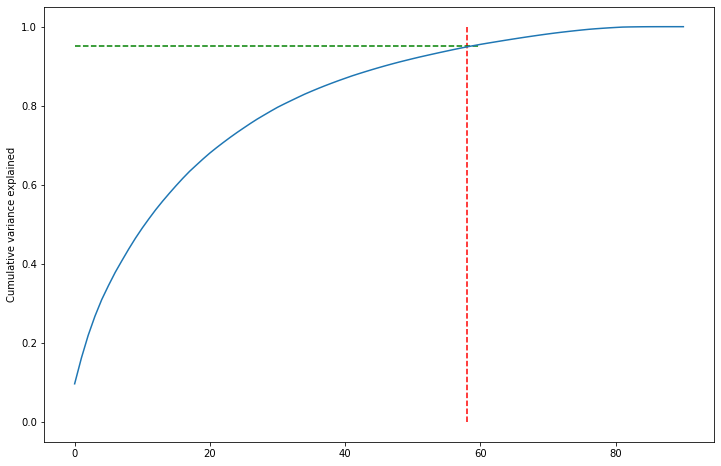

In [104]:
# Making a scree plot for the explained variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=58, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=60, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

We can see that **58 components** explain amost more than 95 % variance of the data. So, we will perform PCA with 58 components.

#### Performing PCA with 58 components

In [105]:
# Instantiate PCA with 58 components
pca_final = IncrementalPCA(n_components=58)

In [106]:
# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)

# Applying transformation on the test set
X_test_pca = pca_final.transform(X_test)

In [107]:
# Check the size of X_train_pca
print("X_train PCA dataframe have {0} Rows and {1} Columns".format(X_train_pca.shape[0], X_train_pca.shape[1]))

X_train PCA dataframe have 26686 Rows and 58 Columns


In [108]:
# Check the size of X_test_pca
print("X_test PCA dataframe have {0} Rows and {1} Columns".format(X_test_pca.shape[0], X_test_pca.shape[1]))

X_test PCA dataframe have 6286 Rows and 58 Columns


### Logistic Regression With PCA

In [109]:
# Inverse of regularization strength (C) : smaller values specify stronger regularization.
# Hyperparameters for Tuning
params = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=42)

# Specifing score as recall as we are more focused on acheiving the higher sensitivity
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [110]:
# Printing the best hyperparameter alpha
print('Best C : ', model_cv.best_params_['C'])
print('Best Score', model_cv.best_score_)

Best C :  0.1
Best Score 0.8755802363914864


In [111]:
# Results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.0418,0.0057,0.0049,0.0040,0.001,{'C': 0.001},0.8843,0.8667,0.8609,0.8768,0.8723,0.8722,0.0081,7,0.8727,0.8732,0.8747,0.8726,0.8735,0.8733,0.0008
1,0.0477,0.0015,0.0031,0.0063,0.01,{'C': 0.01},0.8824,0.8760,0.8670,0.8768,0.8745,0.8754,0.0050,6,0.8780,0.8754,0.8783,0.8762,0.8790,0.8774,0.0013
2,0.0637,0.0016,0.0031,0.0062,0.1,{'C': 0.1},0.8813,0.8775,0.8670,0.8776,0.8745,0.8756,0.0048,1,0.8781,0.8763,0.8783,0.8757,0.8781,0.8773,0.0011
3,0.0751,0.0073,0.0000,0.0000,1,{'C': 1},0.8809,0.8771,0.8663,0.8776,0.8752,0.8754,0.0049,2,0.8782,0.8760,0.8776,0.8754,0.8779,0.8770,0.0011
4,0.0727,0.0080,0.0032,0.0063,10,{'C': 10},0.8809,0.8771,0.8663,0.8776,0.8752,0.8754,0.0049,2,0.8782,0.8760,0.8776,0.8755,0.8778,0.8770,0.0011
5,0.0690,0.0079,0.0062,0.0077,100,{'C': 100},0.8809,0.8771,0.8663,0.8776,0.8752,0.8754,0.0049,2,0.8782,0.8760,0.8776,0.8754,0.8778,0.8770,0.0011
6,0.0681,0.0088,0.0062,0.0077,1000,{'C': 1000},0.8809,0.8771,0.8663,0.8776,0.8752,0.8754,0.0049,2,0.8782,0.8760,0.8776,0.8754,0.8778,0.8770,0.0011


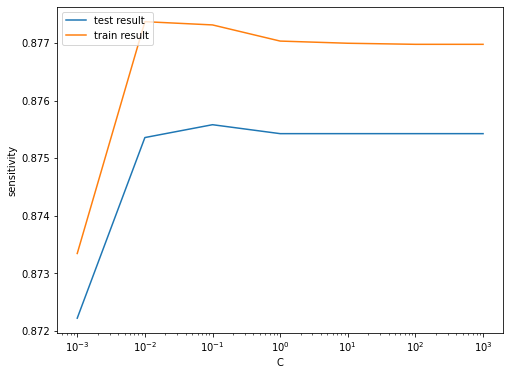

In [112]:
# Plotting mean test and train scores with C
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [113]:
# Instantiate the model with best C
lm = LogisticRegression(C=model_cv.best_params_['C'])

# Fit the model on the train set
log_pca_model = lm.fit(X_train_pca, y_train)

# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

In [114]:
# Confusion matrix
confusion = confusion_matrix(y_train, y_train_pred)
print(confusion)

[[11137  2206]
 [ 1647 11696]]


In [115]:
# Calculate metrics
metric_log_pca_train = calculate_metrics(y_train, y_train_pred, confusion)

Accuracy :  0.855617177546279
Sensitivity :  0.8765644907442105
Specificity :  0.8346698643483474


In [116]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

In [117]:
# Confusion matrix
confusion = confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4746 1011]
 [ 138  391]]


In [118]:
# Calculate metrics
metric_log_pca_test = calculate_metrics(y_test, y_test_pred, confusion)

Accuracy :  0.8172128539611836
Sensitivity :  0.7391304347826086
Specificity :  0.8243877019280875


### Decision Tree Classifier With PCA

In [119]:
# Hyperparameters for Tuning
params = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=42)

# Instantiate the grid search model
dtree = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = params, 
                           scoring= 'recall',
                           cv = folds, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [120]:
# Printing the best hyperparameter alpha
print('Best Score : ', grid_search.best_score_)
print('Best Param Estimator', grid_search.best_estimator_)

Best Score :  0.8333677681665341
Best Param Estimator DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=42)


In [121]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 42,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=42)

In [122]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[11450  1893]
 [ 1764 11579]]


In [123]:
# Calculate metrics
metric_dt_pca_train = calculate_metrics(y_train, y_train_pred, confusion)

Accuracy :  0.8629618526568238
Sensitivity :  0.8677958480101926
Specificity :  0.858127857303455


In [124]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4751 1006]
 [ 210  319]]


In [125]:
# Calculate metrics
metric_dt_pca_test = calculate_metrics(y_test, y_test_pred, confusion)

Accuracy :  0.806554247534203
Sensitivity :  0.6030245746691871
Specificity :  0.8252562098315095


### Random Forest Tree With PCA

In [126]:
# Hyperparameters for Tuning
params = {
    'max_depth': range(5, 10, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100, 200, 300], 
    'max_features': [10, 20]
}

# Creating KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=42)

# Create a based model
rf = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = params, 
                           cv = folds,
                           n_jobs = -1,
                           verbose = 1, 
                           scoring= 'recall',
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='recall', verbose=1)

In [127]:
# Printing the best hyperparameter alpha
print('Best Score : ', grid_search.best_score_)
print('Best Param Estimator', grid_search.best_estimator_)

Best Score :  0.8394644638692382
Best Param Estimator RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50, n_estimators=200, random_state=42)


In [128]:
# Model with the best hyperparameters
rft_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=10,
                             n_estimators=200,
                             random_state=42)

In [129]:
# Fit the model
rft_model.fit(X_train_pca, y_train)

# Predictions on the train set
y_train_pred = rft_model.predict(X_train_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[11448  1895]
 [ 2012 11331]]


In [130]:
# Calculate metrics
metric_rf_pca_train = calculate_metrics(y_train, y_train_pred, confusion)

Accuracy :  0.8535936446076594
Sensitivity :  0.8492093232406506
Specificity :  0.8579779659746684


In [131]:
# Prediction on the test set
y_test_pred = rft_model.predict(X_test_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4891  866]
 [ 199  330]]


In [132]:
# Calculate metrics
metric_rf_pca_test = calculate_metrics(y_test, y_test_pred, confusion)

Accuracy :  0.830575882914413
Sensitivity :  0.6238185255198487
Specificity :  0.8495744311273232


### Adaboost with PCA

In [133]:
# Instantiate adaBoost Classifier
adaboost =  AdaBoostClassifier(n_estimators=200, random_state=42)

In [134]:
# Fitting Model
adaboost.fit(X_train_pca, y_train)

AdaBoostClassifier(n_estimators=200, random_state=42)

In [135]:
# Predictions on the train and test set
y_train_pred = adaboost.predict(X_train_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[11671  1672]
 [ 1502 11841]]


In [136]:
# Calculate metrics
metric_ad_pca_train = calculate_metrics(y_train, y_train_pred, confusion)

Accuracy :  0.8810612306078094
Sensitivity :  0.8874316120812411
Specificity :  0.8746908491343776


In [137]:
y_test_pred = adaboost.predict(X_test_pca)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4913  844]
 [ 181  348]]


In [138]:
# Calculate metrics
metric_ad_pca_test = calculate_metrics(y_test, y_test_pred, confusion)

Accuracy :  0.8369392300349984
Sensitivity :  0.6578449905482041
Specificity :  0.8533958659023797


## Model without PCA

### Logistic regression with No PCA

In [139]:
# Function to calculate the VIFs for each model
def generate_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [140]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train)

# Logistic regression model
logm1 = sm.GLM(y_train, X_train_sm_1, family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                26686
Model:                            GLM   Df Residuals:                    26594
Model Family:                Binomial   Df Model:                           91
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8858.6
Date:                Tue, 13 Dec 2022   Deviance:                       17717.
Time:                        18:32:19   Pearson chi2:                 9.49e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5144
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.6238      0.027    -22.975      0.000      -0.677      -0.571
arpu_6                 0.3479      0.099      3.530      0.000       0.155       0.541
arpu_7                 0.5121      0.100      5.124      0.000       0.316       0.708
arpu_8                -0.0414      0.111     -0.374      0.708      -0.258       0.175
onnet_mou_6           -8.4807      2.370     -3.578      0.000     -13.126      -3.835
onnet_mou_7            3.1446      0.846      3.718      0.000       1.487       4.802
onnet_mou_8           -0.0046      0.821     -0.006      0.996      -1.613       1.604
offnet_mou_6          -7.5942      2.278     -3.334      0.001     -12.059      -3.129
offnet_mou_7           2.4830      0.736      3.373      0.001       1.040       3.926
offnet_mou_8          -0.4127      0.750     -0.551      0.582      -1.882       1.056
roam_ic_mou_6          0.0675      0.030      2.230      0.026       0.008       0.127
roam_ic_mou_8         -0.0119      0.026     -0.453      0.650      -0.063       0.039
roam_og_mou_6          2.0841      0.621      3.356      0.001       0.867       3.301
roam_og_mou_7         -0.4765      0.167     -2.858      0.004      -0.803      -0.150
roam_og_mou_8          0.1852      0.176      1.053      0.292      -0.160       0.530
loc_og_t2t_mou_6       3.3021      0.917      3.600      0.000       1.505       5.100
loc_og_t2t_mou_7      -1.2685      0.341     -3.717      0.000      -1.937      -0.600
loc_og_t2t_mou_8      -0.2047      0.354     -0.578      0.563      -0.899       0.489
loc_og_t2m_mou_6       3.0672      0.958      3.200      0.001       1.189       4.946
loc_og_t2m_mou_7      -0.8995      0.296     -3.044      0.002      -1.479      -0.320
loc_og_t2m_mou_8      -0.2038      0.330     -0.617      0.537      -0.851       0.443
loc_og_t2f_mou_6       0.3461      0.087      3.958      0.000       0.175       0.517
loc_og_t2f_mou_7      -0.2234      0.056     -3.974      0.000      -0.334      -0.113
loc_og_t2f_mou_8       0.1777      0.052      3.419      0.001       0.076       0.280
loc_og_t2c_mou_7       0.0505      0.027      1.875      0.061      -0.002       0.103
loc_og_t2c_mou_8       0.0627      0.028      2.256      0.024       0.008       0.117
std_og_t2t_mou_6       7.9330      2.223      3.569      0.000       3.576      12.290
std_og_t2t_mou_7      -2.7345      0.785     -3.483      0.000      -4.273      -1.196
std_og_t2t_mou_8      -0.2420      0.727     -0.333      0.739      -1.668       1.184
std_og_t2m_mou_6       7.0722      2.135      3.313      0.001       2.889      11.256
std_og_t2m_mou_7      -2.0283      0.684     -2.966      0.003      -3.369      -0.688
std_og_t2m_mou_8      -0.0254      0.636     -0.040      0.968      -1.272       1.221
std_og_t2f_mou_6       0.1630      0.0

In [141]:
# Instantiate Logistic Regrssion
lm = LogisticRegression()

# Intantiate RFE with 15 columns
rfe = RFE(estimator=lm, n_features_to_select=15)

# Fit the rfe model with train set
rfe = rfe.fit(X_train, y_train)

In [142]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['offnet_mou_7', 'offnet_mou_8', 'loc_og_t2m_mou_7', 'std_og_t2m_mou_7',
       'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_7',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8',
       'monthly_2g_8', 'monthly_3g_8', '6-12 months', '1-2 years', '5+ years'],
      dtype='object')


In [143]:
# Adding constant to X_train
# Selecting only RFE supported columns
X_train_sm_2 = sm.add_constant(X_train[rfe_cols])

# Instantiate the model
logm2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Fit the model
logm2 = logm2.fit()

# Summary
logm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                26686
Model:                            GLM   Df Residuals:                    26670
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9993.7
Date:                Tue, 13 Dec 2022   Deviance:                       19987.
Time:                        18:32:34   Pearson chi2:                 2.90e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4713
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.6550      0.025    -26.526      0.000      -0.703      -0.607
offnet_mou_7         1.6839      0.133     12.642      0.000       1.423       1.945
offnet_mou_8        -0.8670      0.036    -23.830      0.000      -0.938      -0.796
loc_og_t2m_mou_7    -0.6818      0.060    -11.284      0.000      -0.800      -0.563
std_og_t2m_mou_7    -1.1009      0.122     -9.012      0.000      -1.340      -0.862
loc_ic_t2t_mou_7     0.5334      0.057      9.312      0.000       0.421       0.646
loc_ic_t2t_mou_8    -1.3906      0.087    -15.971      0.000      -1.561      -1.220
loc_ic_t2m_mou_7     0.6237      0.047     13.152      0.000       0.531       0.717
loc_ic_t2m_mou_8    -1.8801      0.070    -26.989      0.000      -2.017      -1.744
loc_ic_t2f_mou_8    -0.5225      0.057     -9.188      0.000      -0.634      -0.411
std_ic_t2t_mou_8    -0.6817      0.055    -12.412      0.000      -0.789      -0.574
monthly_2g_8        -0.8590      0.048    -17.792      0.000      -0.954      -0.764
monthly_3g_8        -0.6450      0.035    -18.547      0.000      -0.713      -0.577
6-12 months         -0.5637      0.017    -33.202      0.000      -0.597      -0.530
1-2 years           -0.7012      0.017    -40.331      0.000      -0.735      -0.667
5+ years            -0.8860      0.024    -37.184      0.000      -0.933      -0.839
====================================================================================
"""

In [144]:
# Generate VIF
generate_vif(X_train[rfe_cols])

,Features,VIF
0,offnet_mou_7,33.40
3,std_og_t2m_mou_7,28.80
2,loc_og_t2m_mou_7,6.78
6,loc_ic_t2m_mou_7,3.26
7,loc_ic_t2m_mou_8,3.21
...,...,...
13,1-2 years,1.11
12,6-12 months,1.08
10,monthly_2g_8,1.04
11,monthly_3g_8,1.03


In [145]:
# Remove offnet_mou_7 from RFE supported list
list_of_columns = rfe_cols.to_list()
list_of_columns.remove('offnet_mou_7')
print(list_of_columns)

['offnet_mou_8', 'loc_og_t2m_mou_7', 'std_og_t2m_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8', 'monthly_2g_8', 'monthly_3g_8', '6-12 months', '1-2 years', '5+ years']


In [146]:
# Adding constant to X_train
X_train_sm_3 = sm.add_constant(X_train[list_of_columns])

#Instantiate the model
logm3 = sm.GLM(y_train, X_train_sm_3, family=sm.families.Binomial())

# Fit the model
logm3 = logm3.fit()

# Summary
logm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                26686
Model:                            GLM   Df Residuals:                    26671
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10107.
Date:                Tue, 13 Dec 2022   Deviance:                       20213.
Time:                        18:32:35   Pearson chi2:                 2.96e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4668
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.6684      0.025    -27.157      0.000      -0.717      -0.620
offnet_mou_8        -0.7237      0.033    -21.758      0.000      -0.789      -0.658
loc_og_t2m_mou_7    -0.0273      0.030     -0.922      0.357      -0.085       0.031
std_og_t2m_mou_7     0.3753      0.028     13.610      0.000       0.321       0.429
loc_ic_t2t_mou_7     0.5283      0.058      9.165      0.000       0.415       0.641
loc_ic_t2t_mou_8    -1.4012      0.088    -15.893      0.000      -1.574      -1.228
loc_ic_t2m_mou_7     0.6425      0.048     13.465      0.000       0.549       0.736
loc_ic_t2m_mou_8    -1.9830      0.070    -28.306      0.000      -2.120      -1.846
loc_ic_t2f_mou_8    -0.4854      0.056     -8.650      0.000      -0.595      -0.375
std_ic_t2t_mou_8    -0.6573      0.054    -12.132      0.000      -0.764      -0.551
monthly_2g_8        -0.8473      0.047    -17.865      0.000      -0.940      -0.754
monthly_3g_8        -0.6430      0.035    -18.586      0.000      -0.711      -0.575
6-12 months         -0.5633      0.017    -33.411      0.000      -0.596      -0.530
1-2 years           -0.7051      0.017    -40.897      0.000      -0.739      -0.671
5+ years            -0.8819      0.024    -37.265      0.000      -0.928      -0.836
====================================================================================
"""

In [147]:
# Generate VIF
generate_vif(X_train[list_of_columns])

,Features,VIF
5,loc_ic_t2m_mou_7,3.26
6,loc_ic_t2m_mou_8,3.20
4,loc_ic_t2t_mou_8,2.32
3,loc_ic_t2t_mou_7,2.23
0,offnet_mou_8,1.90
...,...,...
12,1-2 years,1.11
11,6-12 months,1.08
9,monthly_2g_8,1.04
10,monthly_3g_8,1.03


In [148]:
# Remove loc_og_t2m_mou_7 from column list
list_of_columns.remove('loc_og_t2m_mou_7')
print(list_of_columns)

['offnet_mou_8', 'std_og_t2m_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8', 'monthly_2g_8', 'monthly_3g_8', '6-12 months', '1-2 years', '5+ years']


In [149]:
# Adding constant to X_train
X_train_sm_4 = sm.add_constant(X_train[list_of_columns])

#Instantiate the model
logm4 = sm.GLM(y_train, X_train_sm_4, family=sm.families.Binomial())

# Fit the model
logm4 = logm4.fit()

# Summary
logm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                26686
Model:                            GLM   Df Residuals:                    26672
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10107.
Date:                Tue, 13 Dec 2022   Deviance:                       20214.
Time:                        18:32:35   Pearson chi2:                 2.91e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4668
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.6682      0.025    -27.147      0.000      -0.716      -0.620
offnet_mou_8        -0.7307      0.032    -22.520      0.000      -0.794      -0.667
std_og_t2m_mou_7     0.3799      0.027     13.983      0.000       0.327       0.433
loc_ic_t2t_mou_7     0.5265      0.058      9.140      0.000       0.414       0.639
loc_ic_t2t_mou_8    -1.4004      0.088    -15.884      0.000      -1.573      -1.228
loc_ic_t2m_mou_7     0.6255      0.044     14.220      0.000       0.539       0.712
loc_ic_t2m_mou_8    -1.9846      0.070    -28.316      0.000      -2.122      -1.847
loc_ic_t2f_mou_8    -0.4867      0.056     -8.668      0.000      -0.597      -0.377
std_ic_t2t_mou_8    -0.6545      0.054    -12.111      0.000      -0.760      -0.549
monthly_2g_8        -0.8469      0.047    -17.859      0.000      -0.940      -0.754
monthly_3g_8        -0.6417      0.035    -18.573      0.000      -0.709      -0.574
6-12 months         -0.5631      0.017    -33.403      0.000      -0.596      -0.530
1-2 years           -0.7049      0.017    -40.886      0.000      -0.739      -0.671
5+ years            -0.8828      0.024    -37.337      0.000      -0.929      -0.836
====================================================================================
"""

In [150]:
# Generate VIF
generate_vif(X_train[list_of_columns])

,Features,VIF
5,loc_ic_t2m_mou_8,3.20
4,loc_ic_t2m_mou_7,2.77
3,loc_ic_t2t_mou_8,2.32
2,loc_ic_t2t_mou_7,2.22
0,offnet_mou_8,1.68
...,...,...
11,1-2 years,1.11
10,6-12 months,1.08
8,monthly_2g_8,1.04
9,monthly_3g_8,1.03


In [151]:
# Getting the predicted value on the train set
y_train_pred_no_pca = logm4.predict(X_train_sm_4)

In [152]:
# Create a dataframe with churn and predicted probability
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_no_pca.values})

# Assigning Customer ID for each record for better readblity
# CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

# View first 5 entries of dataframe
y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,0.0468,0
1,0,0.0126,1
2,0,0.3345,2
3,0,0.0001,3
4,1,0.6201,4


In [153]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)

# View first 5 entries of dataframe
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.0468,0,1,0,0,0,0,0,0,0,0,0
1,0,0.0126,1,1,0,0,0,0,0,0,0,0,0
2,0,0.3345,2,1,1,1,1,0,0,0,0,0,0
3,0,0.0001,3,1,0,0,0,0,0,0,0,0,0
4,1,0.6201,4,1,1,1,1,1,1,1,0,0,0


In [154]:
# Creating a dataframe for scoring different cutoffs
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[i,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0    0.5000       1.0000       0.0000
0.1          0.1    0.7252       0.9798       0.4707
0.2          0.2    0.7748       0.9627       0.5868
0.3          0.3    0.8088       0.9412       0.6765
0.4          0.4    0.8266       0.9102       0.7429
0.5          0.5    0.8397       0.8706       0.8088
0.6          0.6    0.8256       0.7875       0.8638
0.7          0.7    0.8057       0.7062       0.9052
0.8          0.8    0.7881       0.6292       0.9469
0.9          0.9    0.6601       0.3314       0.9888


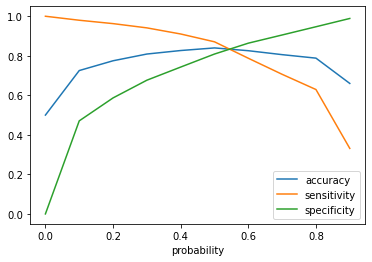

In [155]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

In [156]:
# Creating a column with name "predicted", which is the predicted value for 0.4 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.4 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.0468,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.0126,1,1,0,0,0,0,0,0,0,0,0,0
2,0,0.3345,2,1,1,1,1,0,0,0,0,0,0,0
3,0,0.0001,3,1,0,0,0,0,0,0,0,0,0,0
4,1,0.6201,4,1,1,1,1,1,1,1,0,0,0,1


In [157]:
# Confusion metrics
confusion = confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[ 9913  3430]
 [ 1198 12145]]


In [158]:
# Calculate metrics
metric_log_train = calculate_metrics(y_train_pred_final['churn'], y_train_pred_final['predicted'], confusion)

Accuracy :  0.8265757325938694
Sensitivity :  0.9102150940568088
Specificity :  0.74293637113093


In [159]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

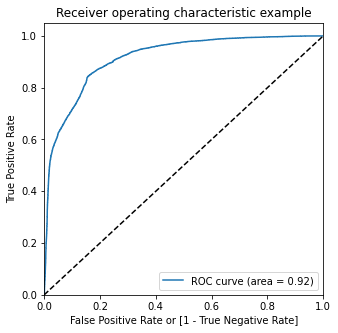

In [160]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

In [161]:
# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables
X_test_log = X_test[list_of_columns]

# Adding constant on the test set
X_test_sm = sm.add_constant(X_test_log)

In [162]:
# Predict on the test set
y_test_pred = logm4.predict(X_test_sm)

In [163]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
58916,2.6499e-02
62078,3.3457e-03
15956,3.3563e-04
57290,6.1630e-03
28511,1.0946e-06


In [164]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn_probability
58916,0
62078,0
15956,0
57290,0
28511,0


In [165]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [166]:
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

y_test_pred_final.head()

,churn_probability,CustID,0
0,0,58916,2.6499e-02
1,0,62078,3.3457e-03
2,0,15956,3.3563e-04
3,0,57290,6.1630e-03
4,0,28511,1.0946e-06


In [167]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob', 'churn_probability':'churn'})

In [168]:
# Rearranging the columns
y_test_pred_final = y_test_pred_final[['CustID','churn','churn_prob']]
y_test_pred_final.head()

,CustID,churn,churn_prob
0,58916,0,2.6499e-02
1,62078,0,3.3457e-03
2,15956,0,3.3563e-04
3,57290,0,6.1630e-03
4,28511,0,1.0946e-06


In [169]:
# In the test set using probablity cutoff 0.4, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.4 else 0)
y_test_pred_final.head()

,CustID,churn,churn_prob,test_predicted
0,58916,0,2.6499e-02,0
1,62078,0,3.3457e-03,0
2,15956,0,3.3563e-04,0
3,57290,0,6.1630e-03,0
4,28511,0,1.0946e-06,0


In [170]:
# Confusion matrix
confusion = confusion_matrix(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])
print(confusion)

[[4246 1511]
 [ 105  424]]


In [171]:
# Calculate metrics
metric_log_test = calculate_metrics(y_test_pred_final['churn'], y_test_pred_final['test_predicted'], confusion)

Accuracy :  0.7429207763283487
Sensitivity :  0.8015122873345936
Specificity :  0.7375369115858954


### Decision Tree without PCA

In [172]:
# Instantiate Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42, max_depth=4)

In [173]:
# Fit model on X_train
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [174]:
# Predict value from test and train dataset
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

In [175]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      5757
           1       0.34      0.82      0.48       529

    accuracy                           0.85      6286
   macro avg       0.66      0.83      0.69      6286
weighted avg       0.93      0.85      0.88      6286



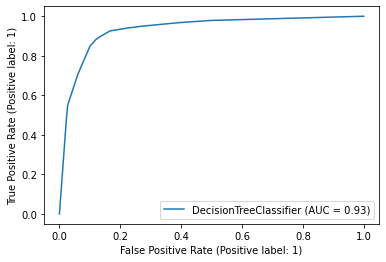

In [176]:
plot_roc_curve(dt_model, X_train, y_train, drop_intermediate=False)
plt.show()

In [177]:
# Hyperparameters for Tuning
params = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}

# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=42)

# Instantiate the grid search model
dtree = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=dtree,
                           param_grid=params,
                           cv=folds,
                           n_jobs=-1,
                           verbose=1,
                           scoring="recall")

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [178]:
# Printing the best hyperparameter alpha
print('Best Score : ', grid_search.best_score_)
print('Best Param Estimator', grid_search.best_estimator_)

Best Score :  0.9028404568287984
Best Param Estimator DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=42)


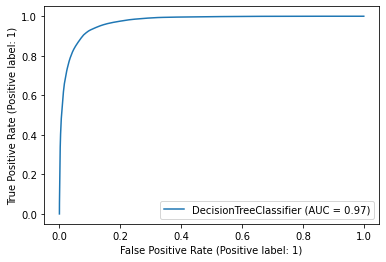

In [179]:
dt_best = grid_search.best_estimator_
plot_roc_curve(dt_best, X_train, y_train)
plt.show()

In [180]:
# Model with optimal hyperparameters
dt_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state=42,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

# Fit model with train dataset
dt_model.fit(X_train, y_train)

# Predictions on the train set
y_train_pred = dt_model.predict(X_train)

# Confusion matrix
confusion = confusion_matrix(y_train, y_train_pred)
print(confusion)

[[12066  1277]
 [  996 12347]]


In [181]:
# Calculate metrics
metric_dt_train = calculate_metrics(y_train, y_train_pred, confusion)

Accuracy :  0.9148242524169977
Sensitivity :  0.9253541182642584
Specificity :  0.9042943865697369


In [182]:
# Prediction on the test set
y_test_pred = dt_model.predict(X_test)

# Confusion matrix
confusion = confusion_matrix(y_test, y_test_pred)
print(confusion)

[[5042  715]
 [ 136  393]]


In [183]:
# Calculate metrics
metric_dt_test = calculate_metrics(y_train, y_train_pred, confusion)

Accuracy :  0.9148242524169977
Sensitivity :  0.7429111531190926
Specificity :  0.8758033698106653


### Random Forest Classifier without PCA

In [184]:
# Instantiate Random Forest Classifier
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [185]:
# Fit the model to training dataset
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [186]:
# Out of bag (OOB) score
print('Out of Bag (OOB) score is : ', rf.oob_score_)

Out of Bag (OOB) score is :  0.8103874690849134


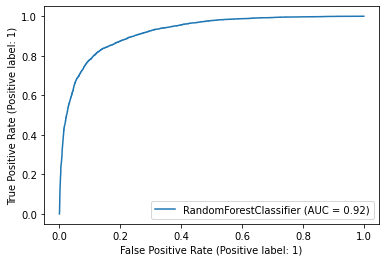

In [187]:
# Plot ROC curve
plot_roc_curve(rf, X_train, y_train)
plt.show()

In [188]:
# Hyperparameters for Tuning
params = {
    'max_depth': range(5, 10, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100, 200, 300], 
    'max_features': [10, 20]
}

# Creating KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=42)

# Create a based model
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv=folds,
                           n_jobs=-1,
                           verbose=1,
                           scoring="recall")

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             scoring='recall', verbose=1)

In [189]:
# Printing the best hyperparameter alpha
print('Best Score : ', grid_search.best_score_)
print('Best Param Estimator', grid_search.best_estimator_)

Best Score :  0.8961465460451278
Best Param Estimator RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=50, n_estimators=200, n_jobs=-1,
                       random_state=42)


In [190]:
# Model with the best hyperparameters
rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=20,
                             n_estimators=200,
                             n_jobs=-1,
                             random_state=42)

# Fit the model
rfc_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=20, min_samples_leaf=50,
                       min_samples_split=50, n_estimators=200, n_jobs=-1,
                       random_state=42)

In [191]:
# Predictions on the train set
y_train_pred = rfc_model.predict(X_train)

# Confusion matrix
confusion = confusion_matrix(y_train, y_train_pred)
print(confusion)

[[11819  1524]
 [ 1282 12061]]


In [192]:
# Calculate metrics
metric_rf_train = calculate_metrics(y_train, y_train_pred, confusion)

Accuracy :  0.8948512328561793
Sensitivity :  0.9039196582477703
Specificity :  0.8857828074645882


In [193]:
# Prediction on the test set
y_test_pred = rfc_model.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[5030  727]
 [ 101  428]]


In [194]:
# Calculate metrics
metric_rf_test = calculate_metrics(y_train, y_train_pred, confusion)

Accuracy :  0.8948512328561793
Sensitivity :  0.8090737240075614
Specificity :  0.8737189508424527


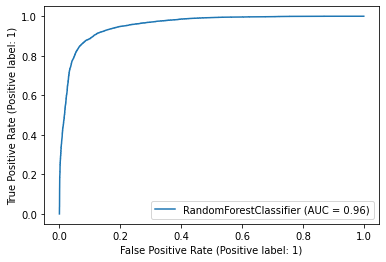

In [195]:
rf_best = grid_search.best_estimator_
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

In [196]:
rf_best.feature_importances_

array([8.23861486e-04, 7.64229382e-04, 1.19339265e-01, 3.32054697e-04,
       4.46246175e-04, 3.08723841e-03, 1.57216660e-03, 4.84635876e-04,
       1.28933556e-02, 1.99224186e-03, 1.07896896e-01, 1.47554938e-03,
       8.10615144e-03, 1.42790530e-01, 1.99399168e-04, 3.97051627e-04,
       1.97356897e-02, 6.63944790e-04, 9.88066030e-04, 7.15146908e-02,
       2.67515837e-04, 4.10420866e-04, 2.58001542e-03, 3.53561808e-03,
       1.37696745e-04, 7.92272821e-04, 3.34588031e-03, 1.59631354e-03,
       2.92397633e-04, 6.89132365e-04, 3.42426413e-03, 4.61509147e-07,
       2.18025480e-04, 2.42377086e-06, 7.98877115e-04, 2.27254263e-03,
       1.86932493e-03, 7.02215726e-04, 3.30232871e-04, 4.70839084e-04,
       4.74556241e-02, 5.04800674e-04, 1.41269619e-03, 1.64156518e-01,
       1.19577544e-04, 7.06651440e-04, 5.80837135e-03, 7.13017144e-04,
       2.00175134e-04, 2.27273686e-04, 5.88421595e-04, 4.49368552e-03,
       2.23918587e-04, 7.18871066e-05, 1.18513852e-04, 4.98462983e-04,
      

In [197]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
43,loc_ic_t2m_mou_8,0.1642
13,roam_og_mou_8,0.1428
2,arpu_8,0.1193
60,total_rech_amt_8,0.1170
10,roam_ic_mou_8,0.1079
...,...,...
77,sachet_2g_7,0.0000
76,sachet_2g_6,0.0000
82,sachet_3g_6,0.0000
83,sachet_3g_7,0.0000


### Adaboost without PCA

In [198]:
# Instantiate Adaboost Classifier
adaboost =  AdaBoostClassifier(n_estimators=200, random_state=42)

# Fitting Model
adaboost.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=200, random_state=42)

In [199]:
# Predictions on the train set
y_train_pred = adaboost.predict(X_train)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[12516   827]
 [  728 12615]]


In [200]:
# Calculate metrics
metric_ad_train = calculate_metrics(y_train, y_train_pred, confusion)

Accuracy :  0.9417297459341977
Sensitivity :  0.9454395563216668
Specificity :  0.9380199355467286


In [201]:
# Predictions on the test set
y_test_pred = adaboost.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[5332  425]
 [ 182  347]]


In [202]:
# Calculate metrics
metric_ad_test = calculate_metrics(y_test, y_test_pred, confusion)

Accuracy :  0.9034362074451161
Sensitivity :  0.6559546313799622
Specificity :  0.9261768282091367


In [203]:
# Creating a table which contains all the metrics
metric_dict = {'Metric' : ['Accuracy', 'Sensitivity', 'Specificity'],
               'Logistic Regression with PCA (Train)' : metric_log_pca_train, 
               'Logistic Regression with PCA (Test)' : metric_log_pca_test,
               'Decision Tree with PCA (Train)' : metric_dt_pca_train, 
               'Decision Tree with PCA (Test)' : metric_dt_pca_test,
               'Random Forest with PCA (Train)' : metric_rf_pca_train, 
               'Random Forest with PCA (Test)' : metric_rf_pca_test,
               'Adaboost with PCA (Train)' : metric_ad_pca_train, 
               'Adaboost with PCA (Test)' : metric_ad_pca_test,
               'Logistic Regression (Train)' : metric_log_train, 
               'Logistic Regression (Test)' : metric_log_test,
               'Decision Tree (Train)' : metric_dt_train, 
               'Decision Tree (Test)' : metric_dt_test,
               'Random Forest (Train)' : metric_rf_train, 
               'Random Forest (Test)' : metric_rf_test,
               'Adaboost (Train)' : metric_ad_train, 
               'Adaboost (Test)' : metric_ad_test}

metric_df = pd.DataFrame(metric_dict)
metric_df

,Metric,Logistic Regression with PCA (Train),Logistic Regression with PCA (Test),Decision Tree with PCA (Train),Decision Tree with PCA (Test),Random Forest with PCA (Train),Random Forest with PCA (Test),Adaboost with PCA (Train),Adaboost with PCA (Test),Logistic Regression (Train),Logistic Regression (Test),Decision Tree (Train),Decision Tree (Test),Random Forest (Train),Random Forest (Test),Adaboost (Train),Adaboost (Test)
0,Accuracy,0.8556,0.8172,0.8630,0.8066,0.8536,0.8306,0.8811,0.8369,0.8266,0.7429,0.9148,0.9148,0.8949,0.8949,0.9417,0.9034
1,Sensitivity,0.8766,0.7391,0.8678,0.6030,0.8492,0.6238,0.8874,0.6578,0.9102,0.8015,0.9254,0.7429,0.9039,0.8091,0.9454,0.6560
2,Specificity,0.8347,0.8244,0.8581,0.8253,0.8580,0.8496,0.8747,0.8534,0.7429,0.7375,0.9043,0.8758,0.8858,0.8737,0.9380,0.9262


## Predict with test data

### Data Understanding

In [204]:
# Read the test dataset
test_df = pd.read_csv('test.csv')

In [205]:
# Check the shape of the dataframe
print('The test data set have {0} rows and {1} columns.\n\nLet\'s see first 5 values of data set.'.format(test_df.shape[0],test_df.shape[1]))

The test data set have 30000 rows and 171 columns.

Let's see first 5 values of data set.


In [206]:
# Check the first five rows
test_df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [207]:
# Check the dataframe info
test_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 171 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        30000 non-null  int64  
 1    circle_id                 30000 non-null  int64  
 2    loc_og_t2o_mou            29684 non-null  float64
 3    std_og_t2o_mou            29684 non-null  float64
 4    loc_ic_t2o_mou            29684 non-null  float64
 5    last_date_of_month_6      30000 non-null  object 
 6    last_date_of_month_7      29798 non-null  object 
 7    last_date_of_month_8      29633 non-null  object 
 8    arpu_6                    30000 non-null  float64
 9    arpu_7                    30000 non-null  float64
 10   arpu_8                    30000 non-null  float64
 11   onnet_mou_6               28831 non-null  float64
 12   onnet_mou_7               28828 non-null  float64
 13   onnet_mou_8               28325 non-null  fl

**Observations**

1) We don't have any columns without name.

2) There are lot of NULL values in data set and hence, we will do similar imputation done for train data.

3) We need to remove unnecessary features.

4) We need to rename feature names.


### Data Cleaning and Standardizing

#### Data Duplication and Validity Check

We need make sure that there is no duplicated entries in given data set.

In [208]:
# Check if there is any duplicated entries in rows
test_df[test_df.duplicated()]

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g


**Observation** : There are no such rows that have duplicated entries.

#### Remove NULL values in Columns and Rows in entire index range

Check if there are any rows or columns that have entire content as NULL. We need to drop such columns or rows, since we can't impute any values.

In [209]:
# Check the number of columns having null values across entire index range
test_df.isnull().all().sum()

0

In [210]:
# Check the number of rows having null values across entire column range
test_df.isnull().all(axis = 1).sum()

0

**Conclusion**

* We have 0 columns where entire column values are NULL
* We have no rows which have entire row contents as NULL

In [211]:
# Rename column names as per majority convension
temp_dict = {'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8',
             'og_others_6' : 'og_others_mou_6', 'og_others_7' : 'og_others_mou_7', 'og_others_8' : 'og_others_mou_8',
             'ic_others_6' : 'ic_others_mou_6', 'ic_others_7' : 'ic_others_mou_7', 'ic_others_8' : 'ic_others_mou_8'}
test_df = test_df.rename(temp_dict, axis=1)

In [212]:
# Find percentage of missing values in date column
find_missing_percentage(test_df, test_df.columns, 0)

arpu_3g_6                   74.7167
count_rech_3g_6             74.7167
fb_user_6                   74.7167
night_pck_user_6            74.7167
total_rech_data_6           74.7167
max_rech_data_6             74.7167
count_rech_2g_6             74.7167
date_of_last_rech_data_6    74.7167
av_rech_amt_data_6          74.7167
arpu_2g_6                   74.7167
night_pck_user_7            74.3133
arpu_2g_7                   74.3133
fb_user_7                   74.3133
arpu_3g_7                   74.3133
count_rech_2g_7             74.3133
av_rech_amt_data_7          74.3133
max_rech_data_7             74.3133
count_rech_3g_7             74.3133
total_rech_data_7           74.3133
date_of_last_rech_data_7    74.3133
night_pck_user_8            73.5933
arpu_3g_8                   73.5933
arpu_2g_8                   73.5933
count_rech_3g_8             73.5933
total_rech_data_8           73.5933
av_rech_amt_data_8          73.5933
max_rech_data_8             73.5933
fb_user_8                   

In [213]:
# Get the columns with 'mou' (Minutes of usage voice calls) in its name
list_of_columns = [m for m in test_df.columns.to_list() if 'mou' in m]
# Append Other Telecom feature columns
list_of_columns += ['og_others_mou_6', 'og_others_mou_7', 'og_others_mou_8', 'ic_others_mou_6', 'ic_others_mou_7',
                   'ic_others_mou_8']

# Impute zero for missing values in MOU columns
for col in list_of_columns:
    test_df[col].fillna(0.00, inplace=True)

In [221]:
# Get unique count of features with only one value
list_of_columns = find_unique_count(test_df, test_df.columns)

Column Name		Unique Value Count
-----------		------------------
circle_id		1
loc_og_t2o_mou		1
std_og_t2o_mou		1
loc_ic_t2o_mou		1
last_date_of_month_6		1
std_og_t2c_mou_6		1
std_og_t2c_mou_7		1
std_og_t2c_mou_8		1
std_ic_t2o_mou_6		1
std_ic_t2o_mou_7		1
std_ic_t2o_mou_8		1


In [222]:
# Find average of total recharge done at month 6 and 7
test_df['avg_rech_amt_6_7'] = (test_df['total_rech_amt_6'] + test_df['total_rech_amt_7'])/2

In [223]:
# Calculate duration in months by dividing AON by 30 (average days in a month)
test_df['duration'] = test_df['aon'] / 30
# Check the percentile and min-max of duration column
test_df['duration'].describe()

count    30000.0000
mean        40.6008
std         32.0037
min          6.0000
25%         15.5333
50%         28.4333
75%         59.8333
max        139.9000
Name: duration, dtype: float64

In [224]:
# We can see min-max value range and we will divide this feature into various buckets for better prediction
test_df['aon_bucket'] = pd.cut(test_df['duration'],
                             [0, 6, 12, 24, 60, 156],
                             labels = ['0-6 months', '6-12 months', '1-2 years', '2-5 years', '5+ years'])

In [225]:
# Create dummy for all categorical variables
# Store it in a new data frame - 'dummy_df'.
dummy_df = pd.get_dummies(test_df['aon_bucket'], drop_first = True)

# Check how 'dummy_df' data frame looks like
dummy_df.head()

,6-12 months,1-2 years,2-5 years,5+ years
0,0,0,1,0
1,0,0,0,1
2,1,0,0,0
3,0,0,1,0
4,0,1,0,0


In [226]:
# Check size of dummy dataframe
print('Dummy dataframe have {0} rows and {1} columns'.format(dummy_df.shape[0], dummy_df.shape[1]))

# Add the dummy dataframe to the original Telecom Churn dataframe
test_df = pd.concat([test_df, dummy_df], axis = 1)

Dummy dataframe have 30000 rows and 4 columns


In [233]:
# Delete columns as done for train dataset
test_df.drop(labels = dropped_columns, axis = 1, inplace = True)

In [234]:
# Check the shape of the dataframe
print('The data set now have {0} rows and {1} columns'.format(test_df.shape[0], test_df.shape[1]))

The data set now have 30000 rows and 91 columns


In [235]:
# Check the first five rows
test_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_8,og_others_mou_6,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,isd_ic_mou_8,ic_others_mou_7,ic_others_mou_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,vbc_3g_8,vbc_3g_7,vbc_3g_6,6-12 months,1-2 years,5+ years
0,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.00,0.03,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.00,0.03,0.0,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.00,0.0,0.00,103,90,60,50,30,30,30,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0,0,0
1,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.00,0.00,0.0,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,94.23,0.0,0.00,500,500,500,250,250,250,250,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0,0,1
2,329.844,434.884,746.239,7.54,7.86,8.40,16.98,45.81,45.04,22.81,26.08,24.53,53.68,54.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.00,500,1000,1000,300,500,500,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,525.61,758.41,241.84,1,0,0
3,43.550,171.390,24.400,5.31,2.16,0.00,40.04,205.01,24.01,0.00,0.00,0.00,0.00,0.00,5.31,0.00,0.00,2.94,98.61,20.51,0.00,0.00,2.35,6.18,0.00,0.00,2.16,0.00,37.09,94.36,0.00,0.0,0.0,0.0,0.0,0.00,1.15,0.0,58.11,54.64,23.04,487.94,449.83,506.94,0.00,0.38,1.64,0.00,0.00,9.63,11.88,8.83,0.0,0.0,0.00,8.65,0.0,0.00,110,260,0,110,150,0,110,150,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0,0,0
4,306.854,406.289,413.329,450.93,609.03,700.68,60.94,23.84,74.16,0.00,0.00,0.00,0.00,0.00,0.45,0.78,14.56,2.39,2.66,10.94,0.00,0.00,0.00,0.00,0.00,450.48,608.24,686.11,58.54,21.18,63.18,0.0,0.0,0.0,0.0,0.71,4.96,2.2,0.00,0.36,9.91,10.13,9.23,7.69,0.00,0.00,0.00,29.71,107.39,13.88,13.96,32.46,0.0,0.0,1.61,0.00,0.0,0.16,356,490,546,90,130,130,50,130,130,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0,1,0


In [236]:
# Create X_test dataframe
X_test = test_df

In [237]:
# Use transform method to use same scalar parameters used in train data and also we don't want to learn anything from 
# test data.
list_of_columns = X_test.columns
X_test[list_of_columns] = scaler.transform(X_test[list_of_columns])

In [238]:
# Prediction on the test set
y_test_pred = rfc_model.predict(X_test)

In [249]:
# Read the solution dataset
solution_df = pd.read_csv('solution.csv')

In [250]:
# Check the shape of the dataframe
print('The solution data set have {0} rows and {1} columns.\n\nLet\'s see first 5 values of data set.'.format(solution_df.shape[0],solution_df.shape[1]))

The solution data set have 30000 rows and 2 columns.

Let's see first 5 values of data set.


In [256]:
# Check the first five rows
solution_df.head()

,id,churn_probability
0,69999,1
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [252]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_df = pd.DataFrame(y_test_pred)
y_pred_df.head()

,0
0,1
1,0
2,1
3,0
4,0


In [254]:
# Copy to predicted values to solution
solution_df['churn_probability'] = y_pred_df[0]

In [257]:
# Check the first five rows
solution_df.head()

,id,churn_probability
0,69999,1
1,70000,0
2,70001,1
3,70002,0
4,70003,0


In [260]:
# Re-write solution.csv
solution_df.to_csv('solution.csv', index=False)